---
<div style="text-align: center; background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
<p style="text-align: center;"> Конспект лекцій з предмету: </p>
<p style="text-align: center;"><b> "Основи радіоелектроніки" </b></p>
<p style="text-align: center;"> Національний університет “Чернігівська політехніка”
</p>
</div>

---

---
<p style="text-align: center;"> <b>Зміст</b></p>

* [Перехідні процеси в лінійних електричних ланцюгах](#commutation-law)
    * [Перший закон комутації](#first-commutation-law)
    * [Другий закон комутації](#second-commutation-law)
    * [Розрахунок перехідного процесу RL ланцюга](#RL-comutation-calculation-classic)
    * [Розрахунок перехідного процесу RC ланцюга](#RC-comutation-calculation-classic)
* [Операторний метод розрахунку перехідних процесів](#Comutation-calculation-laplace)
    * [Закони Кірхгофа в операторної формі](#Laplace-laws)
    * [Властивості перетворення Лапласа](#Laplace-properties)
    * [Правила переходу від оригіналу до зображення](#Laplace-transform-law)
    * [Розрахунок перехідного процесу RC ланцюга операторним методом](#RC-comutation-calculation-laplace)
* [Перехідні процеси другого порядку](#Comutation-calculation-2nd-order)
     * [Розрахунок паралельного включення RLC](#RLC-series-comutation-calculation-classic)
     * [Розрахунок паралельного включення RLC](#RLC-parallel-comutation-calculation-classic)
* [Ряди Фурье](#Fourier_series)
     * [Узагальнений ряд Фур'є](#Fourier_series_basic)
     * [Тригонометричний ряд Фур'є](#Fourier_series_trig)
     * [Тригонометричний ряд Фур'є з полярними координатами](#Fourier_series_polar)
     * [Комплексна форма ряду Фур'є](#Fourier_series_complex)
     * [Приклад розрахунку тригонометричного ряду Фурьє](#Fourier_series_trig_example)
     * [Приклад розрахунку тригонометричного ряду Фурьє](#Fourier_series_trig_example)
     * [Приклад використання дискретного перетворення Фурьє для отримання спектру сигналу з мікрофона](#Fourier_transform_discrete_microphone)
 
---

In [1]:
from sympy import *
from sympy import symbols, Matrix
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib inline

import math
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot
%matplotlib inline

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

import sympy as smp
import numpy as np

## Закони Кірхгофа

### Перший закон

> Алгебраїчна сума струмів, які сходяться у вузлі електричного кола рівна нулю

### Другий закон

> Алгебраїчна сума ЕРС в замкненому контурі рівна алгебраїчній сумі падінь напруг на всіх опорах цього контуру


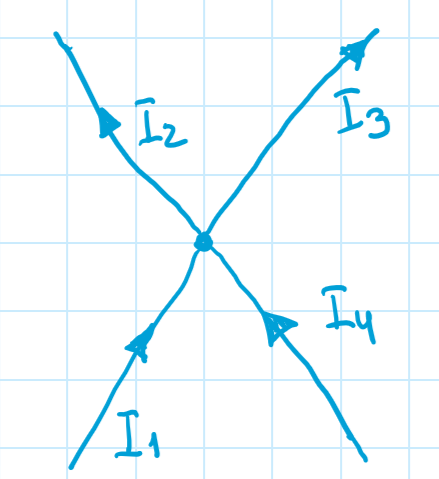

Запишемо рівняння вузла у відповідності до першого закону:

$I_1 - I_2 - I_3 + I_4 = 0$

Перенесено струми,які виходять з вузла в праву частину:

$I_1 + I_4 = I_2 + I_3$

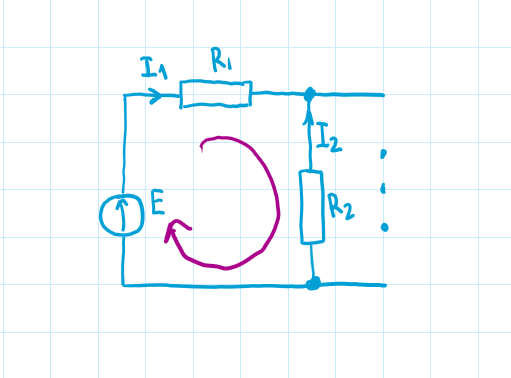

Запишемо рівняння у відповідності до другого закону
 
 $$ I_1 \cdot R_1 - I_2 \cdot R_2 = E $$

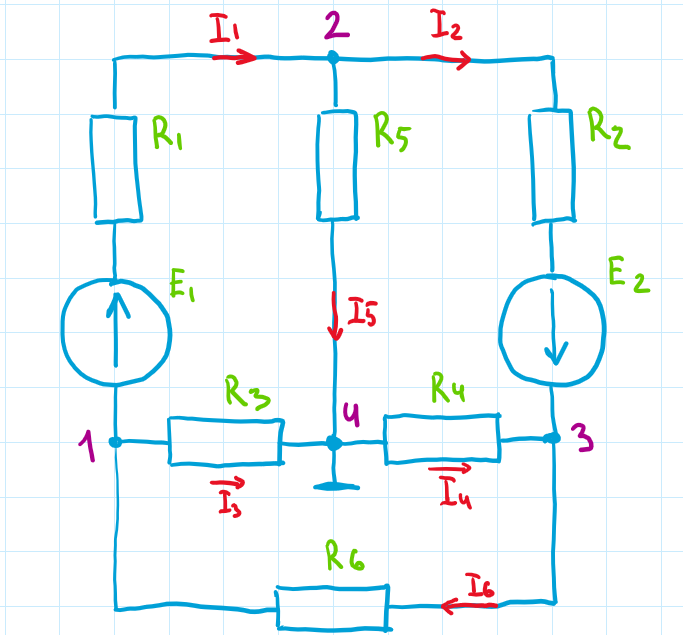

Запишемо рівнянні потенціалів вузлів відносно нульового потунціалу вузла 4

$$ \varphi_2 = \varphi_1 + E_1 - I_1 \cdot R_1 $$
$$ \varphi_3 = \varphi_2 - I_2 \cdot R_2 + E_2 $$
$$ \varphi_1 = \varphi_3 - I_6 \cdot R_6 $$
$$ \varphi_1 = I_3 \cdot R_3 $$
$$ \varphi_2 = I_5 \cdot R_5 $$
$$ \varphi_3 = -I_4 \cdot R_4$$

Запишемо рівняння відносно струмів

$$ I_1 = (\varphi_1 - \varphi_2 + E_1) / R_1 $$

$$ I_2 = (\varphi_2 - \varphi_3 + E_2 )/R_2$$

$$ I_6 = (\varphi_3 -\varphi_1) / R_6 $$

$$ I_3 = \varphi_1 / R_3 $$

$$ I_5 = \varphi_2 / R_5 $$

$$ I_4 = -\varphi_3 / R_4$$

Запишемо рівняння з використанням провідностей

$$ I_1 = (\varphi_1 - \varphi_2 + E_1) \cdot g_1 $$

$$ I_2 = (\varphi_2 - \varphi_3 + E_2 ) \cdot g_2$$

$$ I_6 = (\varphi_3 -\varphi_1) \cdot g_6 $$

$$ I_3 = \varphi_1 \cdot g_3 $$

$$ I_5 = \varphi_2 \cdot g_5 $$

$$ I_4 = -\varphi_3 \cdot g_4$$

Запишемо рівняння для візлів схеми у відповідності до першого закону Кірхгофа

$$ I_6 - I_3 - I_1 = 0 $$

$$ I_1 - I_2 - I_5 = 0 $$

$$ I_2 + I_4 - I_6 = 0 $$

Підставляємо значення струмів

$$ (\varphi_3 -\varphi_1) \cdot g_6 - \varphi_1 \cdot g_3 - (\varphi_1 - \varphi_2 + E_1) \cdot g_1 = 0 $$

$$ (\varphi_1 - \varphi_2 + E_1) \cdot g_1 - (\varphi_2 - \varphi_3 + E_2 ) \cdot g_2 - \varphi_2 \cdot g_5 = 0 $$

$$ (\varphi_2 - \varphi_3 + E_2 ) \cdot g_2 -\varphi_3 \cdot g_4 - (\varphi_3 -\varphi_1) \cdot g_6 = 0 $$

Розкриваємо дужки

$$ \varphi_3\cdot g_6 -\varphi_1\cdot g_6 - \varphi_1 \cdot g_3 - \varphi_1 \cdot g_1 - \varphi_2 \cdot g_1 + E_1 \cdot g_1 = 0 $$

$$ \varphi_1\cdot g_1 - \varphi_2 \cdot g_1 + E_1 \cdot g_1 - \varphi_2\cdot g_2 - \varphi_3\cdot g_2 + E_2\cdot g_2 - \varphi_2 \cdot g_5 = 0 $$

$$ \varphi_2\cdot g_2 - \varphi_3\cdot g_2 + E_2\cdot g_2 -\varphi_3 \cdot g_4 - \varphi_3\cdot g_6 -\varphi_1\cdot g_6 = 0 $$

Перенесемо значення потенціалів вліво і згрупуємо

$$ \varphi_1 \cdot (g_3 + g_1 + g_6) - \varphi_2 \cdot g_1 - \varphi_3\cdot g_6 = - E_1 \cdot g_1 $$

$$ -\varphi_1\cdot g_1 - \varphi_2 \cdot ( g_1 + g_2 + g_5) - \varphi_3\cdot g_2 = E_1 \cdot g_1 - E_2\cdot g_2 $$

$$ -\varphi_1\cdot g_6 - \varphi_2\cdot g_2 + \varphi_3 \cdot (g_2 + g_4 + g_6) = E_2\cdot g_2 $$


> **Власна провідність вузла** визначається як сума провідностей всіх гілок дотичних до данного вузла

$$ g_{11} = g_{1} + g_{3} + g_{6} $$

$$ g_{22} = g_{1} + g_{5} + g_{2} $$

$$ g_{33} = g_{2} + g_{4} + g_{6} $$

> **Міжвузлова провідність** рівна провідності гілки, яка зв'язує два вказаних вузли. ЇЇ значення від'ємне

$$ g_{12} = g_{21} = -g_1 $$

$$ g_{23} = g_{32} = -g_2 $$

$$ g_{31} = g_{13} = -g_6 $$

> **Власний струм вузла** рівний алгебраїчній сумі добутку провідностей гілок на ЕРС гілок, дотичних до данного вузла

$$ J_1 = - E_1 \cdot g_1 $$

$$ J_2 = E_1 \cdot g_1 - E_2 \cdot g_2 $$

$$ J_3 = E_2 \cdot g_2 $$

Виконаємо заміни:

$$ \varphi_1 \cdot g_{11} + \varphi_2 \cdot g_{12} + \varphi_3\cdot g_{13} = J_1 $$

$$ \varphi_1 \cdot g_{21} - \varphi_2 \cdot g_{22} - \varphi_3\cdot g_{23} = J_2 $$

$$ \varphi_1 \cdot g_{31} + \varphi_2 \cdot g_{32} + \varphi_3\cdot g_{33} = J_3 $$

## Випадок з двома вузлами

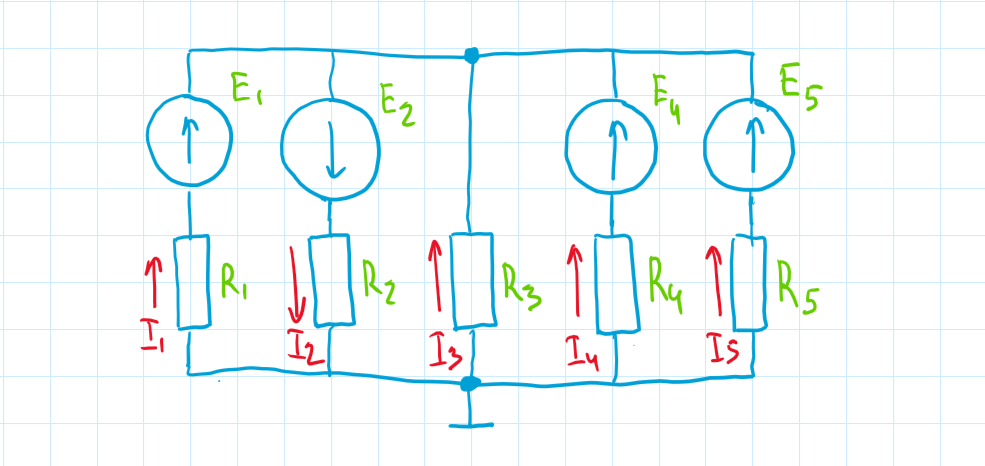

$$ \varphi_1 \cdot g_{11} = J_1 $$

Власна провідність вузла:

$$ g_{11} = g_1 + g_2 + g_3 + g_4 + g_5$$

Власний струм вузла:

$$ J_1 = E_1 \cdot g_1 - E_2 \cdot g_2 + E_4 \cdot g_4 + E_5 \cdot g_5 $$

Виконаємо підстановку:

$$ \varphi_1 \cdot (g_1 + g_2 + g_3 + g_4 + g_5) = E_1 \cdot g_1 - E_2 \cdot g_2 + E_4 \cdot g_4 + E_5 \cdot g_5 $$

Виразимо потенціал вузла:

$$ \varphi_1  = \cfrac{E_1 \cdot g_1 - E_2 \cdot g_2 + E_4 \cdot g_4 + E_5 \cdot g_5}
{g_1 + g_2 + g_3 + g_4 + g_5}$$

В загальному вигляді формула для розрахунку потенціала вузла має наступний вигляд:

   $$ \varphi_1 = \cfrac{\sum_{k=1}^{n} E_{k}\cdot g_{k}}{\sum_{k=1}^{n} g_{k}} $$

Розрахуємо струми в гілках:

$$ I_1 = (E_1 - \varphi_1) \cdot g_1 $$

$$ I_2 = (E_2 + \varphi_1) \cdot g_2 $$

$$ I_3 = (- \varphi_1) \cdot g_3 $$

$$ I_4 = (E_4 - \varphi_1) \cdot g_4 $$

$$ I_5 = (E_5 - \varphi_1) \cdot g_5 $$

In [24]:
# Step 1: Define circuit parameters and initial conditions
E1_s = 40;
E2_s = 20;

R1_s = 10;
R2_s = 40;
R3_s = 10;

E1 = smp.symbols('E1')  # Time symbol
E2 = smp.symbols('E2')  # Time symbol
R1 = smp.symbols('R1')  # Time symbol
R2 = smp.symbols('R2')  # Time symbol
R3 = smp.symbols('R3')  # Time symbol
Phi1 = smp.symbols('Phi1')  # Time symbol

# Step 2: Set up the differential equation
eq = Phi1 * (1/R1 +1/R2 + 1/R3) - E1*(1/R1) + E2*(1/R2)

# Step 3: Solve the differential equation
sol = smp.solve(eq, Phi1)
sol


[R3*(E1*R2 - E2*R1)/(R1*R2 + R1*R3 + R2*R3)]

In [25]:
# Step 4: Convert symbolic solution to a callable function
Phi_func = smp.lambdify([R1, R2,R3,E1,E2], sol, 'numpy')

In [26]:
Phi_func(R1_s, R2_s, R3_s, E1_s, E2_s)

[15.555555555555555]

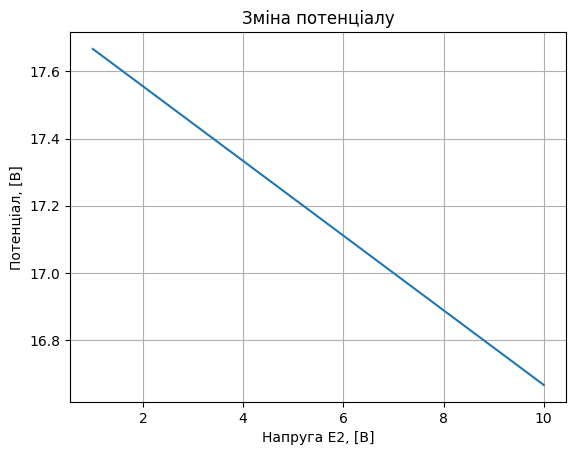

In [27]:
# Step 5: Generate a range of time values
E2_values = np.linspace(1, 10, 10)  # Adjust the range as needed

# Step 6: Evaluate I(t) for each time point
potential_values = np.array([Phi_func(10, R2_s, R3_s, E1_s, E2_sub) for E2_sub in E2_values])

# Step 7: Plot the graph
plt.plot(E2_values, potential_values)
plt.title('Зміна потенціалу')
plt.xlabel('Напруга Е2, [В]')
plt.ylabel('Потенціал, [В]')
plt.grid(True)
plt.show()

### Метод контурних струмів

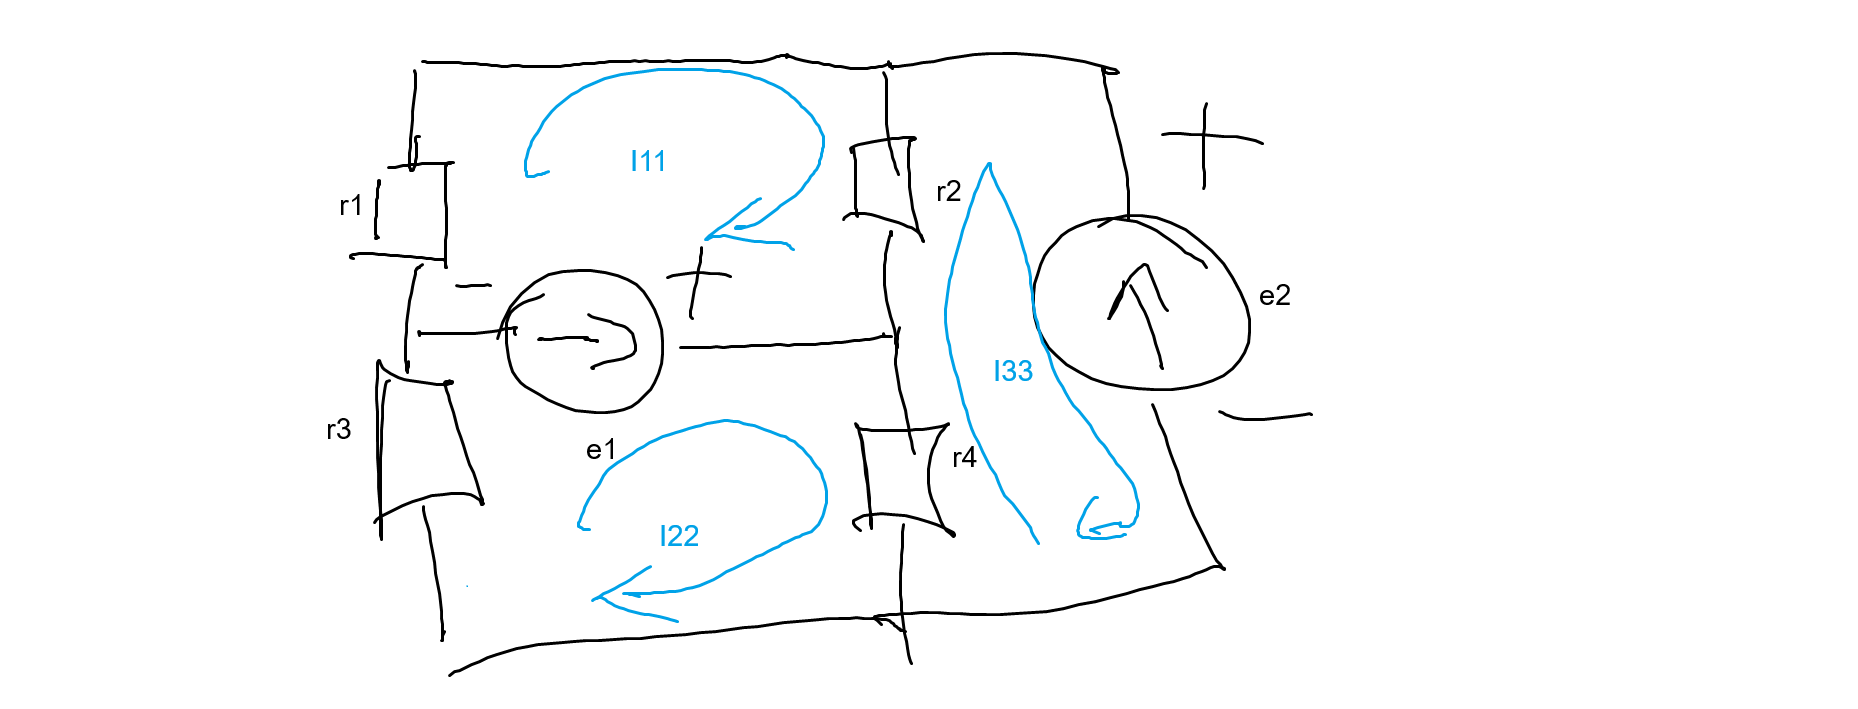

$$ I_{11} \cdot (R_1 + R_2) - I_{33} \cdot R_2 = -E_1$$

$$ I_{22} \cdot (R_3 + R_4) - I_{33} \cdot R_4 = E_1$$

$$ I_{33} \cdot (R_2 + R_4) - I_{11} \cdot R_2 - I_{22} \cdot R_4 = -E_2$$

In [53]:
# Step 1: Define circuit parameters and initial conditions
E1_s = 60;
E2_s = 30;

R1_s = 10;
R2_s = 40;
R3_s = 10;
R4_s = 30;

E1 = smp.symbols('E1')  # Time symbol
E2 = smp.symbols('E2')  # Time symbol
R1 = smp.symbols('R1')  # Time symbol
R2 = smp.symbols('R2')  # Time symbol
R3 = smp.symbols('R3')  # Time symbol
R4 = smp.symbols('R4')  # Time symbol

I11 = smp.symbols('I11')  # Time symbol
I22 = smp.symbols('I22')  # Time symbol
I33 = smp.symbols('I33')  # Time symbol

# Step 2: Set up the differential equation
eq = [I11 * (R1 + R2) - I33 * R2 + E1,  
      I22 * (R3 + R4) - I33 * R4 - E1, 
      I33 * (R2 + R4) - I11 * R2 - I22 * R4 + E2]

# Step 3: Solve the differential equation
sol = smp.solve(eq, [I11, I22, I33])
sol

{I11: (-E1*R2*R3 - E1*R3*R4 - E2*R2*R3 - E2*R2*R4)/(R1*R2*R3 + R1*R2*R4 + R1*R3*R4 + R2*R3*R4),
 I22: (E1*R1*R2 + E1*R1*R4 - E2*R1*R4 - E2*R2*R4)/(R1*R2*R3 + R1*R2*R4 + R1*R3*R4 + R2*R3*R4),
 I33: (E1*R1*R4 - E1*R2*R3 - E2*R1*R3 - E2*R1*R4 - E2*R2*R3 - E2*R2*R4)/(R1*R2*R3 + R1*R2*R4 + R1*R3*R4 + R2*R3*R4)}

In [54]:
print(sol[I11].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s))
print(sol[I22].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s))
print(sol[I33].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s))

I11_s = sol[I11].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s)
I22_s = sol[I22].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s)
I33_s = sol[I33].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s)

-90/31
-3/31
-66/31


In [56]:
print(-90/31)
print(-3/31)
print(-66/31)

-2.903225806451613
-0.0967741935483871
-2.129032258064516


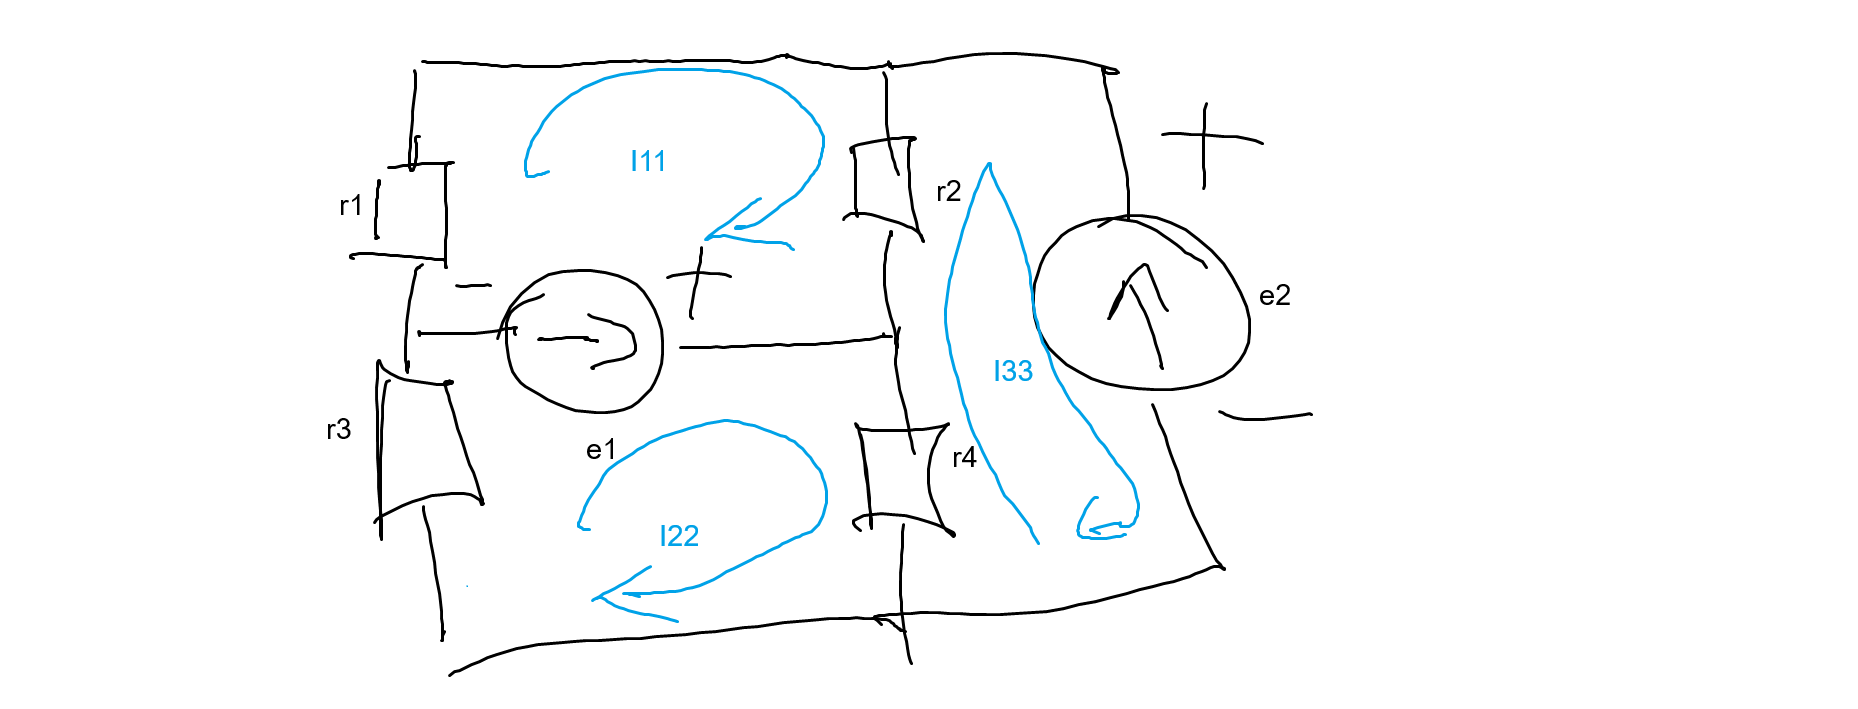

$$ I_1 = I_{11} $$

$$ I_2 = I_{11} - I_{33}$$

$$ I_3 = I_{22} $$

$$ I_4 = I_{22} - I_{33} $$

$$ I_5 = I_{33} $$

$$ I_6 = I_{11} - I_{22} $$

In [57]:
I1 = I11
I2 = I11 - I33
I3 = I22
I4 = I22 - I33
I5 = I33
I6 = I11 - I22

In [58]:
print(I1.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I2.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I3.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I4.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I5.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I6.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))

-90/31
-24/31
-3/31
63/31
-66/31
-87/31


In [59]:
print(-90/31)
print(-24/31)
print(-3/31)
print(63/31)
print(-66/31)
print(-87/31)


-2.903225806451613
-0.7741935483870968
-0.0967741935483871
2.032258064516129
-2.129032258064516
-2.806451612903226


$$ I_{11} \cdot ( R_1 + R_2) - I_{22} \cdot R_2 = E_1 - E_2 $$

$$ I_{22} \cdot ( R_2 + R_3) - I_{11} \cdot R_2 = E_2 $$


$$ I_{22} \cdot ( R_2 + R_3) = I_{11} \cdot R_2 + E_2 $$

$$ I_{22} = \cfrac{ I_{11} \cdot R_2 + E_2}{R_2 + R_3} $$




$$ I_{11} \cdot( ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2) = E_1 - E_2 $$


$$ I_{11} = \cfrac{E_1 - E_2}{ ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2} $$

$$ I_{22} \cdot ( R_2 + R_3) = \cfrac{E_1 - E_2}{ ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2} \cdot R_2 + E_2 $$

$$ I_{22} = \cfrac{\cfrac{E_1 - E_2}{ ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2} \cdot R_2 + E_2}{R_2 + R_3} $$

$$ I_1 = I_{11}$$

$$ I_2 = I_{11} - I_{22}$$

$$ I_3 = I_{22}$$


# Перехідні процеси в лінійних електричних ланцюгах із зосередженими параметрами, основні поняття та визначення <a class="anchor" id="commutation-law"></a>
    
**Перехідним** називається процес зміни в часі струмів та напруг, який виникає в електричній схемі при переході від одного усталеного режиму до іншого внаслідок комутації.

**Комутація** – це зміна параметрів елементів (наприклад, зміна величини опору резистора) або зміна топології кола, яку на електричній схемі відображають за допомогою ідеальних ключів.

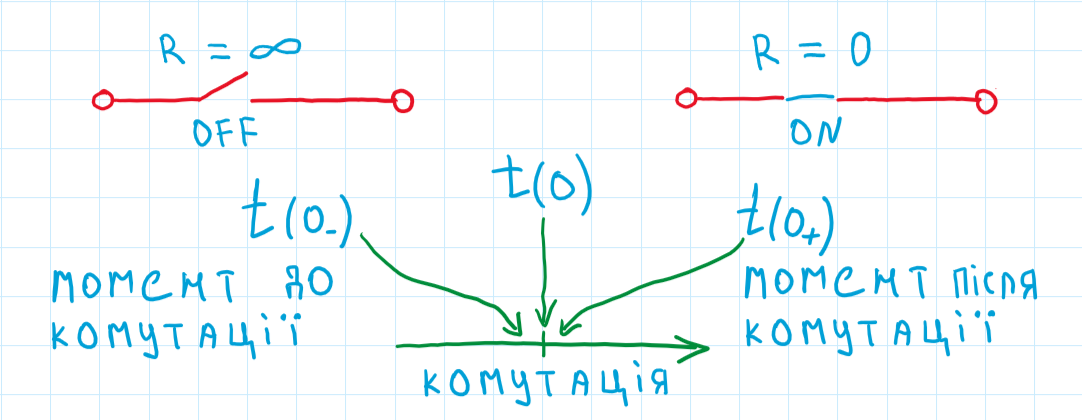

**Ідеальні ключі** мають такі властивості:
1. в замкненому стані опір ключа дорівнює нулю;
2. в розімкненому стані провідність ключа дорівнює нулю;
3. час перемикання ключа дорівнює нулю

Необхідними умовами **виникнення перехідних процесів** є:
- наявність у колі хоча б одного реактивного елемента, оскільки саме в часовому процесі переходу від одного усталеного режиму до іншого змінюється накопичена в цьому елементі електромагнітна енергія;
- наявність саме такої комутації, при якій замикаючий ключ знаходиться під ненульовою напругою, або розмикаючий ключ проводить ненульовій струм, оскільки за протилежних умов комутація не змінює стану електричного кола.

---
---

## Перший закон комутації <a class="anchor" id="first-commutation-law"></a>


Розглянемо схему з індуктивністю **L** і резистором **R**:

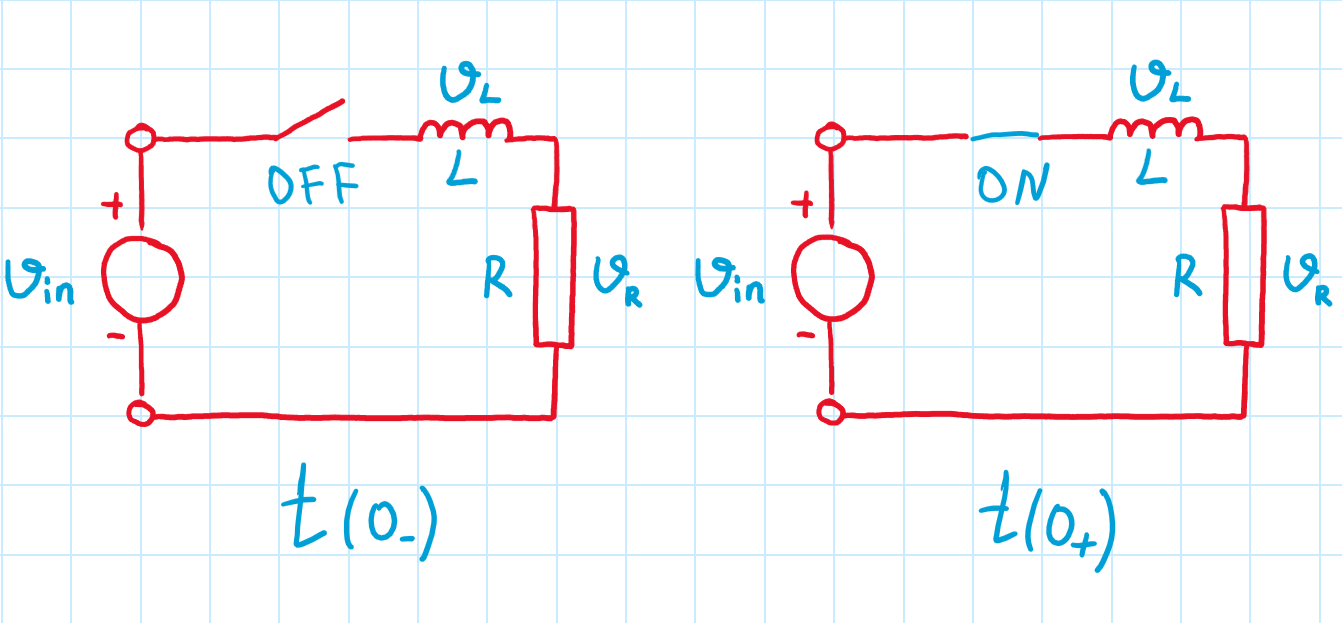

Запишемо рівняння яке описує схему:

$$
  v_{in} = v_{R} + v_{L}
$$

Враховуючи що:

$$
v_{R} = i R; \quad   v_{L} = L \frac{di}{dt};
$$

$$
  v_{in} = i R + L \frac{di}{dt}
$$

Якщо би струм міг змінюватись миттєво то похідна струму $i$ буде наближатись до $\infty$:

$$
  \frac{di}{dt} => \infty 
$$ 
  
І відповідно:

$$
  v_{L} = L \frac{di}{dt} => \infty
$$

> У початковий момент після комутації струм в котушці індуктивності залишається саме таким, яким він був безпосередньо перед комутацією

$$
  i_{L}(0_{-}) = i_{L}(0_{+})
$$

---
---

## Другий закон комутації  <a class="anchor" id="second-commutation-law"></a>
    
Розглянемо схему з ємністю **C** і резистором **R**:

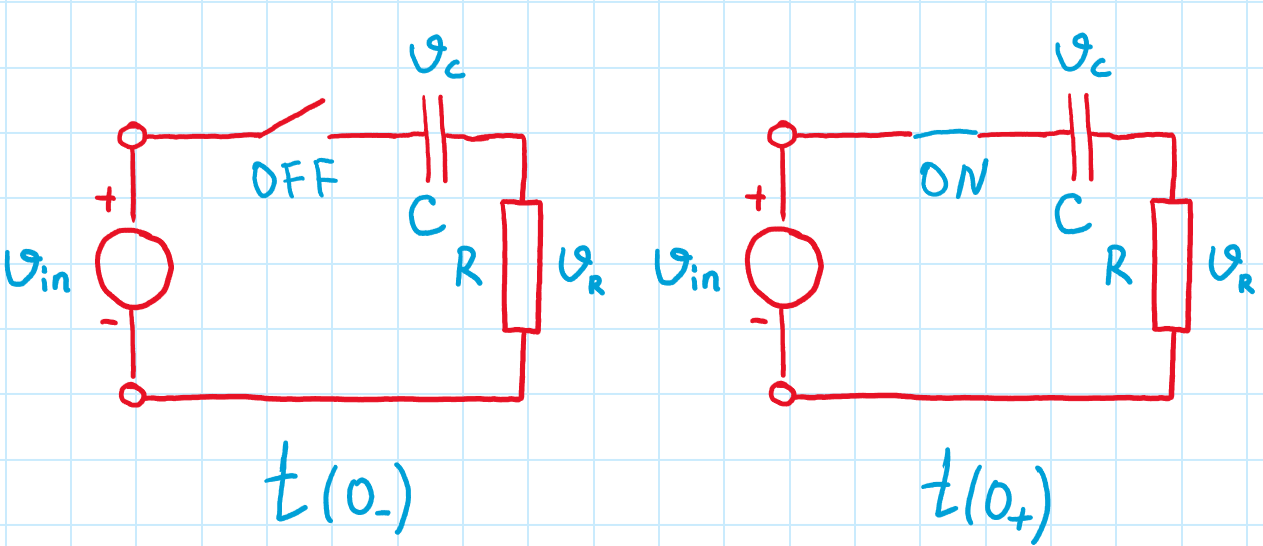

Запишемо рівняння яке описує схему:

$$
  v_{in} = v_{R} + v_{С};
$$

Враховуючи що:

$$
i_{C} = C \frac{d u_{C}}{dt};
$$

$$
  v_{in} = v_{c} + R C \frac{d u_{C}}{dt};
$$

Якщо би струм міг змінюватись миттєво:

$$
  \frac{d u_{C}}{dt} => \infty 
$$ 
  
І відповідно:

$$
  i_{C} = C \frac{d u_{C}}{dt} => \infty
$$

> у початковий момент після комутації напруга на конденсаторі залишається саме такою, якою вона була безпосередньо перед комутацією

$$
  v_{C}(0_{-}) = v_{C}(0_{+})
$$

---
---
## Розрахунок перехідного процесу RL ланцюга  <a class="anchor" id="RL-comutation-calculation-classic"></a>

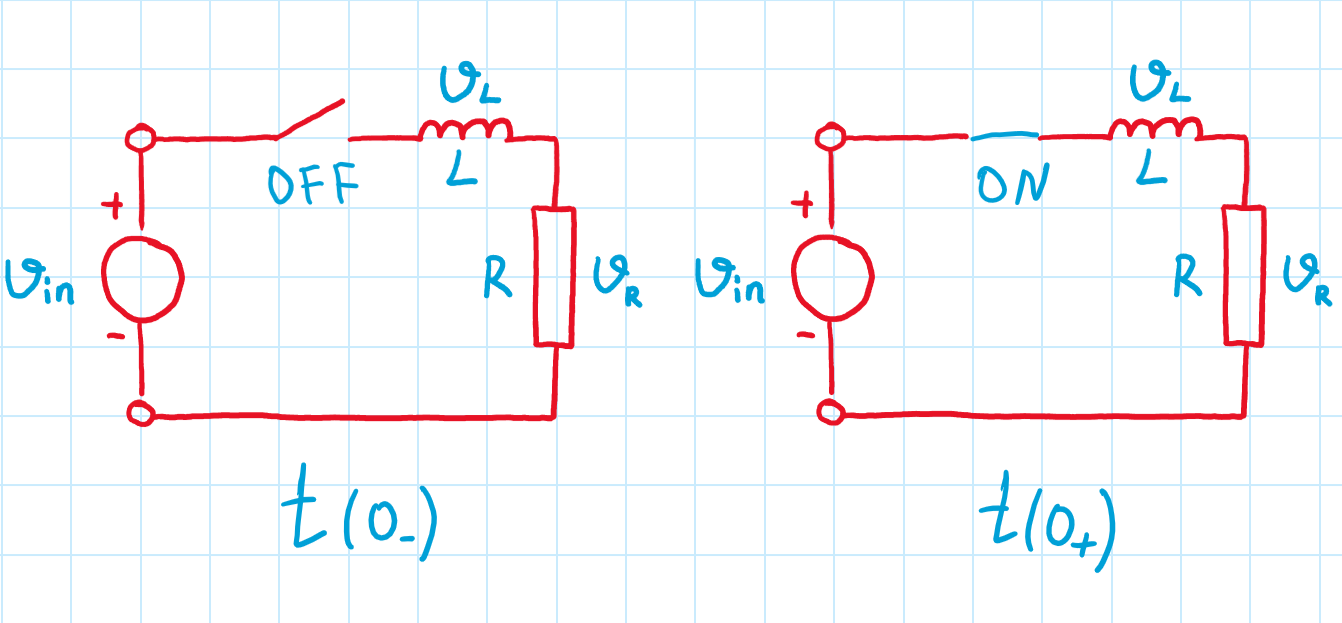

Запишемо рівняння яке описує схему:


$$
  v_{in} = i R + L \frac{di}{dt}
$$

**Порядком електричного кола** називають порядок диференційного рівняння, яким описується коло після комутації. Зазвичай порядок кола співпадає з кількістю його реактивних елементів, тобто у даному випадку розраховується перехідний процес в колі
першого порядку з конденсатором. Підставивши значення сталої часу, отримаємо шукане диференційне рівняння:


Розв’язок диференційного рівняння складає вільну та вимушену складові і отримуємо

$$
i(t) = i_{вм} + i_{вл}
$$

Де:

$i_{вм}$ - вимушена складова, тобто усталена реакція кола на дію джерела;

$i_{вл}$ - вільна складова, яка описує перехідний процесс;


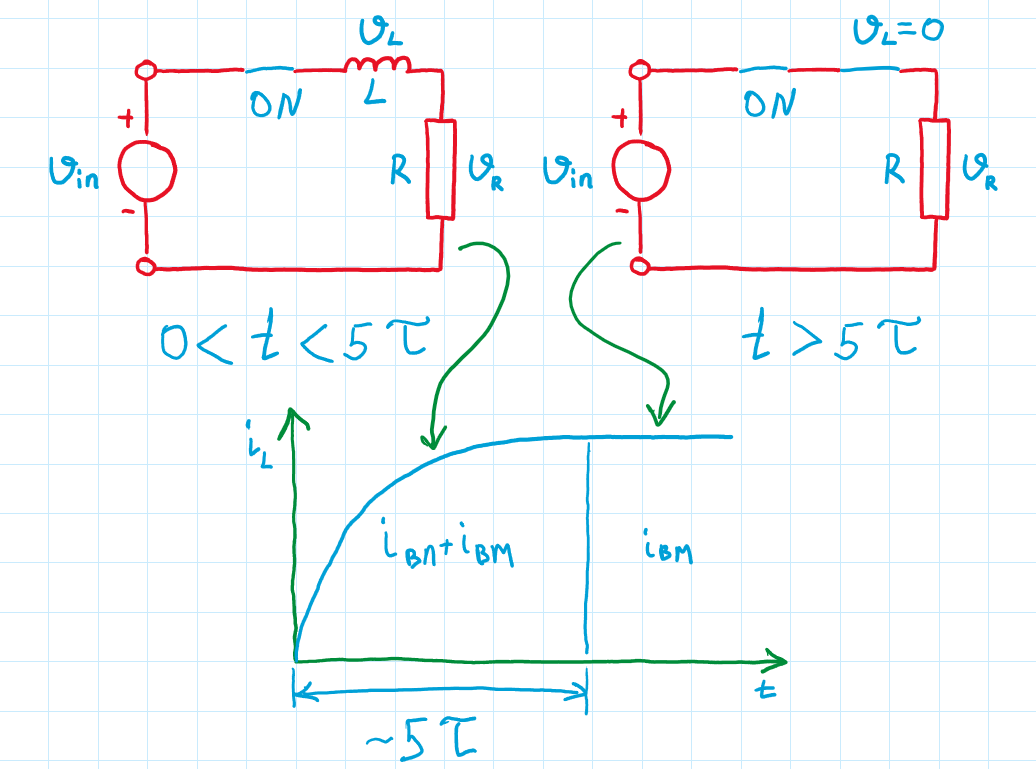

---

Виконаємо розрахунок для наступних параметрів схеми:

$$v_{in} = 80 [V] \quad R=40 [\Omega] \quad L = 0.1 [H] $$

---

Вимушена складова має вигляд

$$i_{вм} = \frac{v_{in}}{Z_{заг}} = \frac{v_{in}}{ R + j \omega L} $$

Оскільки $\omega = 2 \pi f$, а частота постійного джерела напруги нульова:

$$i_{вм} = \frac{v_{in}}{R}  = \frac{80}{40} = 2 А$$


Вільна складова має вигляд:

$$i_{вл} = A e^{pt}$$

$$
  Z(j\omega) = R + j \omega L = 0; \quad j \omega \rightarrow p 
$$

Знайдемо значення p:

$$
  R + p L = 0;  
$$

$$
  p = -\frac{R}{L} = -\frac{40}{0.1} = -400;  
$$

Для знаходження $A$ підставляємо отримані значення до $i(t)$:

$$
i(t) = i_{вм} + i_{вл} = 2 + A e^{-400t}
$$

В момент $t(0+)$, враховуючи перший закон комутації:

$$
i(0+) = i_{вм} + i_{вл} = 2 + A e^{-400 \cdot 0} = 2 + A;
$$

$$
A = -2;
$$

Розв'язок:
$$
i(t) = 2 - 2 e^{-400 \cdot t} [A];
$$


In [3]:
def g(R_sb, L_sb, V_sb):
    R, L, V, t = symbols("R L V t")
    expr = V/R - V/R * exp(-R/L *t) 

    t_values = np.arange(0, 0.05, 0.001)
    # Use list comprehension to substitute each x value into the vector expression
    result_vector = [expr.subs([(R, R_sb), (L, L_sb), (V, V_sb), (t, tim)]) for tim in t_values]
    
    # Create a scatter plot
    plt.scatter(t_values, result_vector)
    plt.xlabel('Час, [с]')
    plt.ylabel('Струм, [A]')
    plt.title('Перехідний процесс RL ланцюга')
    plt.show()

In [4]:
w = interactive(g, 
                R_sb=widgets.IntSlider(min=1, max=100, step=1, value=40, description = 'R'), 
                L_sb=widgets.FloatSlider(min=0.1, max=0.5, step=0.1, value=0.1, description ='L'), 
                V_sb=widgets.IntSlider(min=1, max=100, step=1, value=80, description = '$v_{in}$'))
display(w)

interactive(children=(IntSlider(value=40, description='R', min=1), FloatSlider(value=0.1, description='L', max…

---
---

## Розрахунок перехідного процесу RC ланцюга  <a class="anchor" id="RC-comutation-calculation-classic"></a>


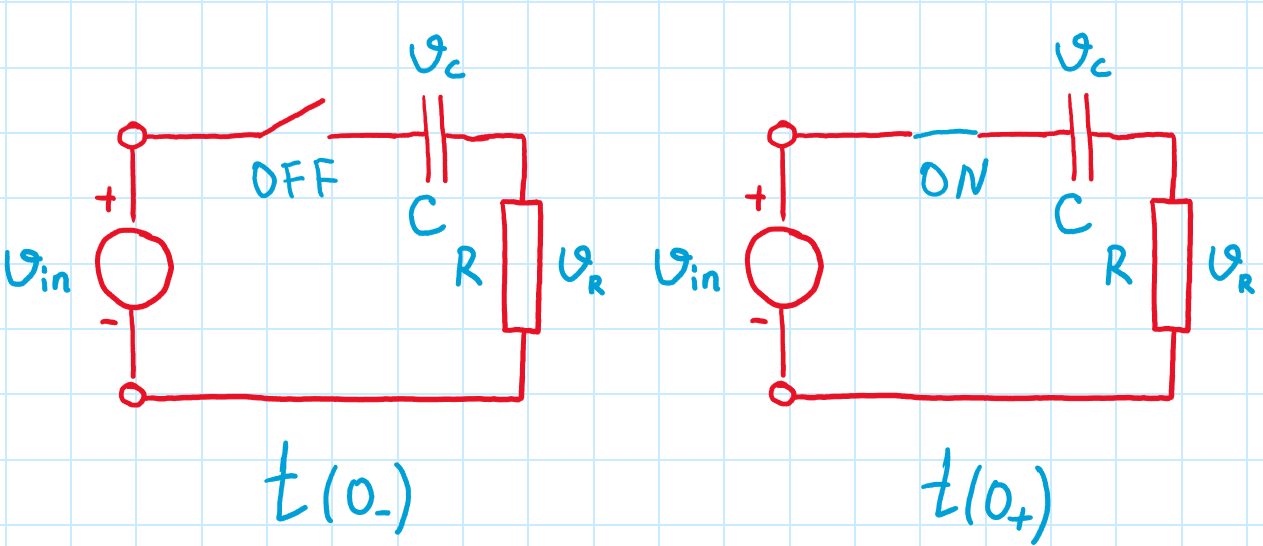

Запишемо рівняння яке описує схему:

$$
  v_{in}(t) = v_{c}(t) + R C \frac{d u_{C}(t)}{dt};
$$

Розв’язок диференційного рівняння складає вільну та вимушену складові і отримуємо

$$
v_{c}(t) = v_{вм}(t) + v_{вл}(t)
$$

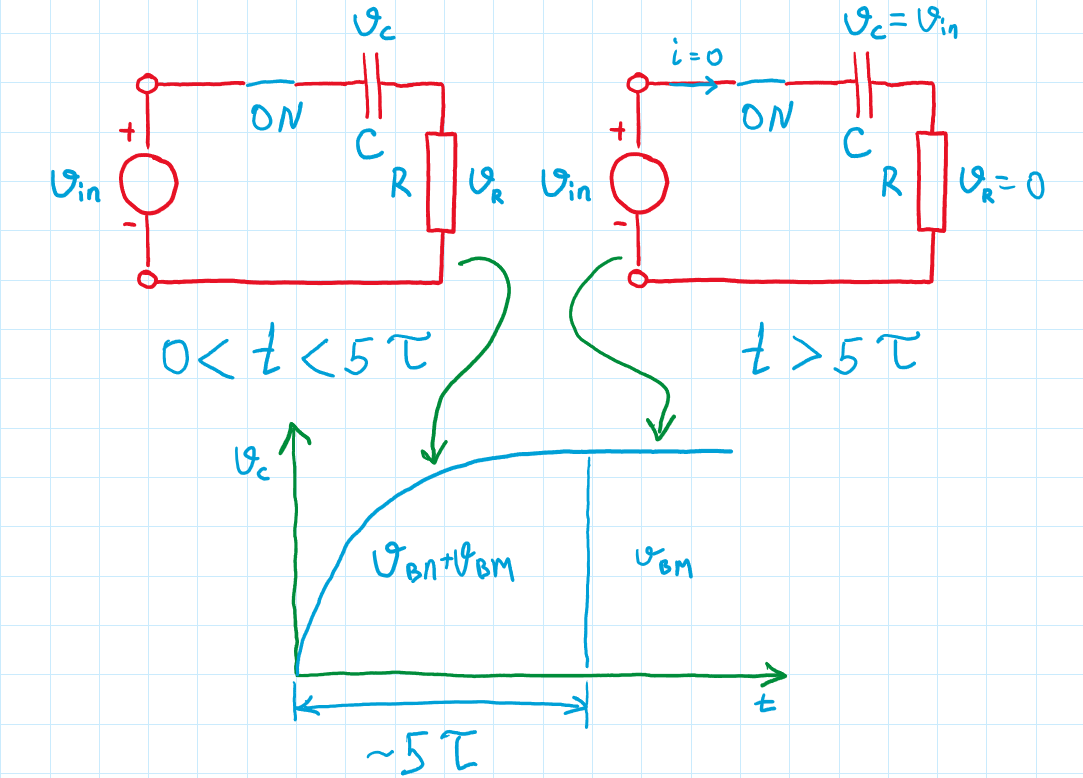

---

Виконаємо розрахунок для наступних параметрів схеми:

$$v_{in} = 80 [V] \quad R=40 [\Omega] \quad C = 0.1 [mF] $$

---

Вимушена складова має вигляд

Оскільки $\omega = 2 \pi f$, а частота постійного джерела напруги нульова:

$$v_{вм}(t) = v_{in}(t) = 80 V$$

Конденсатор зарядиться до напруги живлення. В цей момент відповідно струм буде 0 і падіння напруги на резисторі також буди 0.

Вільна складова має вигляд:

$$v_{вл}(t) = A e^{pt}$$

Запишемо характеристичне рівняння:

$$
  Z(j \omega) = R + \cfrac{1}{j \omega C};
$$

Виконаємо заміну на p і приведемо до загального знаменника:

$$
  Z(p) = R + \cfrac{1}{pC} = \cfrac{RpC+1}{pC};
$$

Прирівняємо праву частину до 0:

$$
  \cfrac{RpC+1}{pC} = 0;
$$

Дріб буде нульовий коли чисельник буде рівним нулю, тоді:

$$
  RpC+1 = 0;
$$

Тоді р:

$$
  p = \cfrac{-1}{RC} = -\frac{1}{4*10^{-3}} = -250;
$$

Для знаходження $A$ підставляємо отримані значення до $v_{c}(t)$:

$$
v_{c}(t) = v_{вм}(t) + v_{вл}(t) = 80V + A e^{-250}
$$

В момент $t(0+)$, враховуючи перший закон комутації:

$$
v_{c}(0+) = v_{вм}(t) + v_{вл}(t) = 80V + A e^{-250 \cdot 0} = 40 + A;
$$

$$
A = -80;
$$

Розв'язок:
$$
v_{c}(t) = 80 - 80 e^{-250 \cdot t} [V];
$$
    

In [10]:
def g(R_sb, C_sb, V_sb):
    R, C, V, t = symbols("R L V t")
    expr = V - V * exp(-1/(R*C*0.0001) *t) 

    t_values = np.arange(0, 0.003, 0.00015)
    # Use list comprehension to substitute each x value into the vector expression
    result_vector = [expr.subs([(R, R_sb), (C, C_sb), (V, V_sb), (t, tim)]) for tim in t_values]
    
    # Create a scatter plot
    plt.scatter(t_values, result_vector)
    plt.xlabel('Час, [с]')
    plt.ylabel('Напруга, [V]')
    plt.title('Перехідний процесс RC ланцюга')
    plt.show()

In [11]:
w = interactive(g, 
                R_sb=widgets.IntSlider(min=10, max=100, step=1, value=40, description = 'R'), 
                C_sb=widgets.FloatSlider(min=0.1, max=0.5, step=0.1, value=0.1, description ='C'), 
                V_sb=widgets.IntSlider(min=1, max=100, step=1, value=80, description = '$v_{in}$'))
display(w)

interactive(children=(IntSlider(value=40, description='R', min=10), FloatSlider(value=0.1, description='C', ma…

## Операторний метод розрахунку перехідних процесів  <a class="anchor" id="Comutation-calculation-laplace"></a>

Сутність **операторного методу** полягає в тому, що функції $f(x)$ дійсної змінної t, яку називають **оригіналом**, ставиться у відповідність функція $F(p)$ комплексної змінної $p = s + j \omega$, яку називають **зображенням**. В результаті цього похідні та інтеграли від оригіналів замінюються алгебраїчними функціями від відповідних зображень (диференціювання замінюється множенням на оператор р, а інтегрування - діленням на нього), що в свою чергу визначає перехід від системи **інтегро-диференціальних рівнянь до системи алгебраїчних рівнянь** щодо зображень шуканих змінних . При вирішенні цих рівнянь знаходяться зображення і далі шляхом зворотного переходу - оригінали. Найважливішим моментом при цьому в практичному плані є необхідність визначення тільки незалежних початкових умов, що істотно полегшує розрахунок перехідних процесів в ланцюгах високого порядку в порівнянні з класичним методом.

Зображення заданої функції визначається відповідно з прямим перетворенням Лапласа:

$$
F(p) = \int_{0}^{\infty}e^{-pt}f(t)dt;
$$

У скороченою записи відповідність між зображенням і оригіналом позначається, як:

$$
F(p) = f(t) \quad   або \quad  F(p) = L\{f(t)\};
$$

Слід зазначити, що якщо оригінал збільшується з ростом t, то для збіжності інтеграла (1) необхідно більш швидке спадання модуля  . Функції, з якими зустрічаються на практиці при розрахунку перехідних процесів, цій умові задовольняють. В якості прикладу в табл. 1 наведено зображення деяких характерних функцій, що часто зустрічаються при аналізі нестаціонарних режимів.

---
---
## Закони Кірхгофа в операторної формі  <a class="anchor" id="Laplace-laws"></a>

**Перший закон Кірхгофа**: алгебраїчна сума зображень струмів, що сходяться у вузлі, дорівнює нулю

$$
\sum_{k=1}^{n} I_{k}(p) = 0;
$$

**Другий закон Кірхгофа**: алгебраїчна сума зображень ЕРС, що діють в контурі, дорівнює алгебраїчній сумі зображень напружень на пасивних елементах цього контуру

$$
\sum_{k=1}^{m} E_{k}(p) = \sum_{k=1}^{m} v_{k}(p);
$$

## Властивості перетворення Лапласа  <a class="anchor" id="Laplace-properties"></a>

Лінійність:

$$
a_{1}f_{1}(t)+a_{2}f_{2}(t)+... \rightarrow a_{1}F_{1}(p)+a_{2}F_{2}(p)+...;
$$

Теорема інтегрування:

$$
x(t) = \int_{0}^{t}f(t)dt+x(0) \rightarrow \frac{1}{p}F(p)+\frac{1}{p}x(0);
$$

Теорема диференціювання:


$$
\frac{d}{dt}f(t) \rightarrow pF(p) - f(0_{+});
$$

$$
\frac{d^{2}}{dt^{2}}f(t) \rightarrow p^{2}F(p) - pf(0_{+}) - \frac{d}{dt}f(0_{+});
$$

$$
\frac{d^{n}}{dt^{n}}f(t) \rightarrow p^{n}F(p) - p^{n-1}f(0_{+}) - p^{n-2}\frac{d}{dt}f(0_{+})-...p\frac{d^{n-2}}{dt^{n-2}}f(0_{+}) - \frac{d^{n-1}}{dt^{n-1}}f(0_{+});
$$

Теорема запізнювання:

$$
f(t-t_{0}) \rightarrow F(p)e^{-pt};
$$


### Правила переходу від оригіналу до зображення  <a class="anchor" id="Laplace-transform-law"></a>

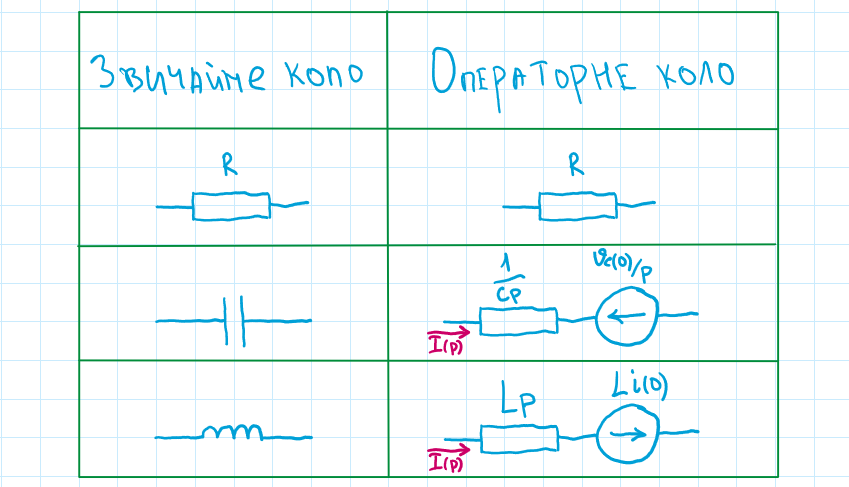

---
---

## Розрахунок перехідного процесу RC ланцюга операторним методом  <a class="anchor" id="RC-comutation-calculation-laplace"></a>


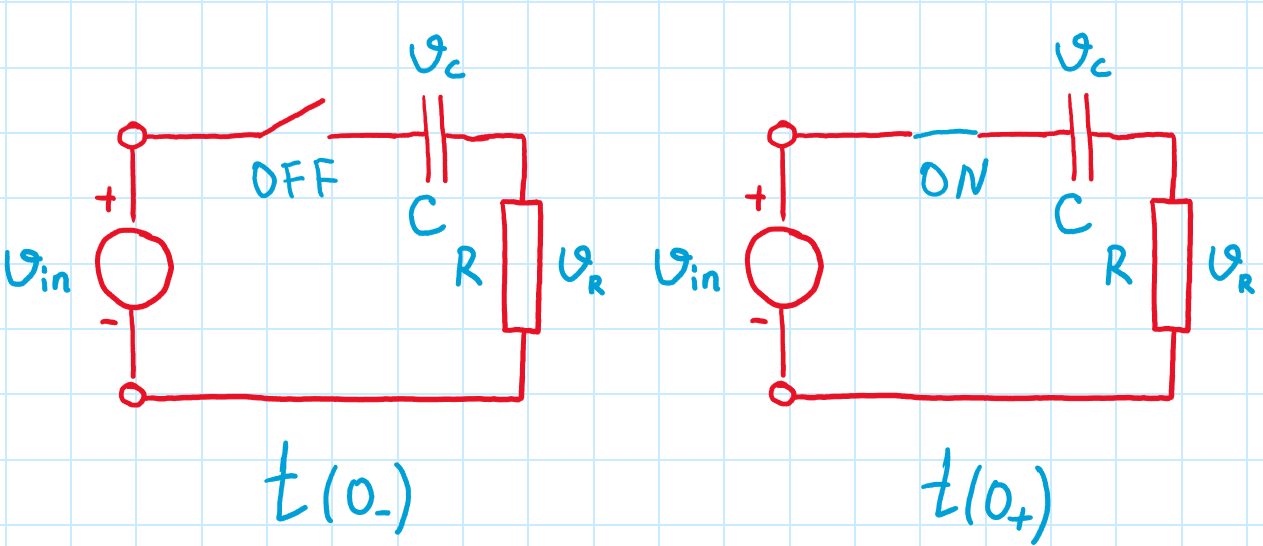

---

Виконаємо розрахунок для наступних параметрів схеми:

$$v_{in} = 80 [V] \quad R=40 [\Omega] \quad C = 0.1 [mF] $$

---

Запишемо операторну схему заміщення

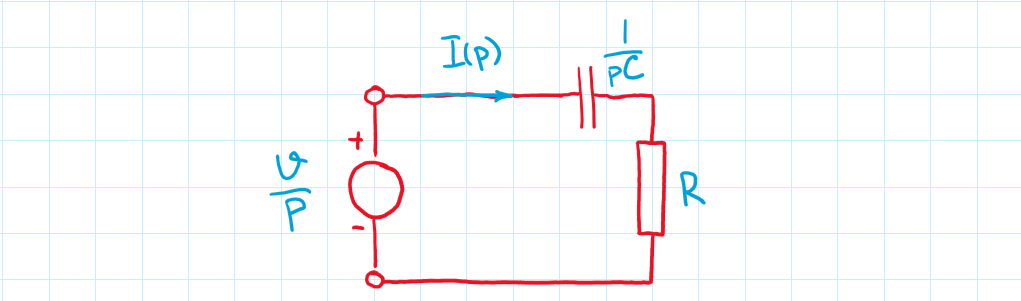

Запишемо рівняння:

$$
  Z(p) = R + \cfrac{1}{pC};
$$

Приведемо до загального знаменника:

$$
  Z(p) = \cfrac{RpC+1}{pC};
$$

Визначимо струм в контурі поділивши вхідну напругу на повний опір схеми:

$$
  I(p) = (\cfrac{v_{in}}{p}) / (\cfrac{RpC+1}{pC}) = (\cfrac{v_{in}}{p}) \cdot (\cfrac{pC}{RpC+1});
$$

Скоротимo p:

$$
  I(p) =  \cfrac{v_{in}C}{RpC+1};
$$


Визначимо напругу на резисторі $R$:

$$
  v_{r}(p) = R \cdot I(p) =  R \cdot \cfrac{v_{in}C}{RpC+1};
$$

Запишемо рівняння по 2-му закону Кірхгофа:

$$
  v_{r}(p) + v_{с}(p) = \cfrac{v_{in}}{p};
$$

Тоді:

$$
   v_{с}(p) = \cfrac{v_{in}}{p} - v_{r}(p) = \cfrac{v_{in}}{p} - R \cdot \cfrac{v_{in}C}{RpC+1};
$$

Приведемо до загального знаменника:

$$
   v_{с}(p) = \cfrac{
   v_{in}(RpC+1) - pv_{in}RC
   }
   {
   p(RpC+1)
   }  
$$

Розкриємо дужки і отримаємо фінальне зображення напруги на конденсаторі $v_{с}(p)$:

$$
   v_{с}(p) = 
   \cfrac{
   v_{in}RCp+v_{in}- pv_{in}RC
   }
   {
   p(RpC+1)
   }
   =
   \cfrac{
   v_{in}
   }
   {
   p(RpC+1)
   }
   =
   \cfrac{
   F_{1}(p)
   }
   {
   F_{2}(p)
   }
$$

Для перевірки знайдемо корені знаменника і порівняємо з класичним методом:

$$
   p(RpC+1) = 0
$$

Перший корінь

$$
   p_{0} = 0
$$

Другий корінь

$$
   RpC+1 = 0
$$

Тоді $р_{1}$:

$$
  p_{1} = \cfrac{-1}{RC} = -\frac{1}{4*10^{-3}} = -250;
$$

$$
  F_{1}(p) = v_{in} = 80;\\
  F_{1}(p_{0}) = 80;\\
  F_{1}(p_{1}) = 80;
$$

$$
  F^{'}_{2}(p) =  p^2RC+p;
$$

Візьмемо похідну і підставимо отримані корені:

$$
  F_{2}(p) =  2pRC+1;
$$

$$
  F^{'}_{2}(p_{0}) = F^{'}_{2}(0) =1;
$$

$$
  F^{'}_{2}(p_{1}) = 2 \cdot -250 \cdot 40 \cdot (0.1) \cdot 10^{-3} + 1 = -1;
$$

Запишемо формулу переходу в часовій області:

$$
  v_{c}(t) = 
  \cfrac{F_{1}(p_{0})}{F^{'}_{2}(p_{0})} \cdot e^{p_{0}t} +
  \cfrac{F_{1}(p_{1})}{F^{'}_{2}(p_{1})} \cdot  e^{p_{1}t};
$$

$$
  v_{c}(t) = \cfrac{80}{1} + \cfrac{80}{-1} \cdot  e^{-250\cdot t};
$$

Розв'язок:
$$
v_{c}(t) = 80 - 80 e^{-250 \cdot t} [V];
$$

## Формула розкладу і її застосування при розрахунку перехідних процесів

Ці формули дозволяють знайти оригінал, якщо зображення задано дробно-раціональної функцією:

$$
F(p) = \frac
{
a_{m}p^{m}+a_{m-1}p^{m-1}+...+a_{1}p+a_{0}
}
{
b_{n}p^{n}+a_{n-1}p^{n-1}+...+a_{1}p+b_{0}
}
$$
 
Власне формулу розкладання можна застосовувати тільки в тому випадку, коли вищий ступінь знаменника вище надзвичайно чисельника. Якщо це не так, то спочатку потрібно поділити чисельник на знаменник, що і дозволить привести F(p) до необхідного виду. 

Приклад:

#### ADD STUFF

Якщо m<n, то зображення записують у вигляді:  .
Характеристичне рівняння - вираз F2(p)=0 і, в залежності від коренів в оригіналі, з'являються відповідного виду складові, кожна з яких відповідає найпростішої дробу. 
Щоб не шукати коефіцієнти дробів з систем рівнянь, користуються формулами розкладання. Вони мають вигляд:

1. Кожному простому кореню характеристичного рівняння   в оригіналі, буде відповідати доданок  , де  ;
2. Серед коренів є пара комплексно спряжених:  ,  . Можна скористатися попередньої формулою для кожного кореня, але перевірка показує, що коефіцієнти перед exp виявляються к.с.ч. і можна спростити процедуру, записуючи відповідь відразу для двох коренів у вигляді:  , де   - корінь з позитивною уявної частиною.
3. Серед коренів є кратні або однакові, у цьому випадку для групи кратних коренів виходять складні вирази, але якщо таких коренів всього два, їм в оригіналі відповідатиме такий запис:
 
 


---
---
## Перехідні процеси другого порядку  <a class="anchor" id="Comutation-calculation-2nd-order"></a>

### Розрахунок послідовного включення RLC  <a class="anchor" id="RLC-series-comutation-calculation-classic"></a>

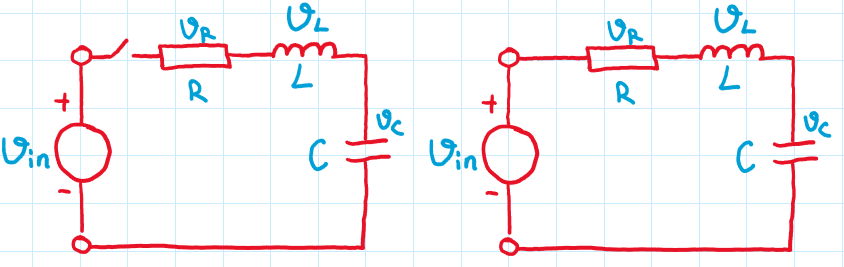

Запишемо дифиренційне рівняння для опису схеми в момент $t(0_+)$ після комутації:

$$v_{in}(t) = v_{R}(t) + v_{L}(t) + v_{C}(t)$$

Струм в контурі:

$$i = i_{c} = C \cdot \cfrac{dv_{c}}{dt}$$

Опишемо напруги на компонентах через напругу на конденсаторі:

$$v_{r} = i \cdot R = RC \cdot \cfrac{dv_{c}}{dt}$$

$$v_{L} = L \cdot \cfrac{di}{dt} = LC \cfrac{d^{2}v_{c}}{dt^{2}}$$

$$ LC \cfrac{d^{2}v_{c}(t)}{dt^{2}} + RC \cdot \cfrac{dv_{c(t)}}{dt} + v_{c}(t) = v_{in}(t)$$

$$ \cfrac{d^{2}v_{c}(t)}{dt^{2}} + \cfrac{R}{L} \cdot \cfrac{dv_{c(t)}}{dt} + \cfrac{1}{LC} v_{c}(t) = \cfrac{v_{in}(t)}{LC}  $$


$$ \cfrac{d^{2}v_{c}(t)}{dt^{2}} + \cfrac{R}{L} \cdot \cfrac{dv_{c(t)}}{dt} + \cfrac{1}{LC} v_{c}(t) = 0  $$

Введемо заміну $D$: 

$$ D^{2} + \cfrac{R}{L} \cdot D + \cfrac{v_{c}}{LC} = 0  $$

Розв'язки рівняння:

$$ D_{1} = -\cfrac{R}{2L} + \sqrt{  (\cfrac{R}{2L})^2 - \cfrac{1}{LC} }$$

$$ D_{2} = -\cfrac{R}{2L} - \sqrt{  (\cfrac{R}{2L})^2 - \cfrac{1}{LC} }$$

Введемо заміни:

$$ \alpha = \cfrac{R}{2L}$$

$$ \beta  = \sqrt{  (\cfrac{R}{2L})^2 - \cfrac{1}{LC} }$$

Розв'язки рівняння:

$$ D_{1} = -\alpha + \beta$$

$$ D_{2} = -\alpha - \beta$$

Natural frequency

$$ \omega = \cfrac{1}{\sqrt{LC}}$$

Damping coefficient

$$ \alpha = \cfrac{R}{2L} $$

Damping factor:

$$ \cfrac{\alpha}{\omega} = \zeta = \cfrac{R}{2} \sqrt{ \cfrac{C}{L} }$$

---
#### Випадок 1: 

$$ (\cfrac{R}{2L})^2 >  \cfrac{1}{LC} $$

В цьому випадку корені рівнняння негативні і некомплексні

$$ v_{c}(t) = C_{1} \cdot e^{-D_{1}t} + C_{2} \cdot e^{-D_{2}t} $$

Overdamped response

$$ (\cfrac{R}{2L})^2 >  \cfrac{1}{LC} $$

 ---
#### Випадок 2: 

$$(\cfrac{R}{2L})^2 =  \cfrac{1}{LC} $$

В цьому випадку корені рівнняння негативні, некомплексні і однакові

$$ D_{1} = D_{2} = - \alpha $$

$$ v_{c}(t) = (C_{1} + C_{2}t) \cdot e^{-\alpha t} $$

Critically damped response
$$ (\cfrac{R}{2L})^2 =  \cfrac{1}{LC} $$

---
#### Випадок 3:

$$ (\cfrac{R}{2L})^2 <  \cfrac{1}{LC} $$

В цьому випадку корені рівнняння комплексно-спряжені

$$ D_{1} = - \alpha + j\beta $$
$$ D_{2} = - \alpha - j\beta $$

$$ v_{c}(t) = e^{-\alpha t} \cdot ( C_{1} cos( \beta t) +C_{2} sin( \beta t)) $$

Under damped response
$$ (\cfrac{R}{2L})^2 < \cfrac{1}{LC} $$

---

#### Випадок 4: 

$$ R = 0 $$

В цьому випадку корені рівнняння комплексні

$$ D_{1} = j \sqrt{\frac{1}{LC}} = j \omega $$
$$ D_{2} = - j \omega $$

$$ v_{c}(t) =   C_{1} cos( \omega t) +C_{2} sin( \omega t)  $$

---

### Приклад розрахунку напруги ємності в числовому вигляді з використанням PySpice

In [8]:
def g(R_sb, L_sb, C_sb):
    # Define circuit
    circuit = Circuit('RLC series connection')
    source = circuit.PulseVoltageSource('input', 1, circuit.gnd,
                                        initial_value=0@u_V, pulsed_value=10@u_V,
                                        pulse_width=100@u_ms, period=200@u_ms)
    # Define components
    circuit.R(1, 2, 1, R_sb@u_Ω)
    circuit.L(1, 3, 2, L_sb@u_mH)
    circuit.C(1, circuit.gnd, 3, C_sb@u_uF)

    # Perform transient analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    steptime = 1@u_us
    finaltime = 200@u_ms
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)

    # Plot the results
    figure, axe = plt.subplots(figsize=(10, 6))
    plt.title('Перехідний процес послідовно включених RLC')
    plt.xlabel('Час, [с]')
    plt.ylabel('Напруга, [В]')

    plot(analysis['1'], axis=axe)
    plot(analysis['3'], axis=axe)

    plt.grid()
    plt.legend(('Вхідний сигнал', 'Напруга на конденсаторі'), loc='best')
    cursor = Cursor(axe, useblit=True, color='red', linewidth=1)
    plt.tight_layout()
    plt.show()

w = interactive(g, 
                R_sb=widgets.IntSlider(min=0, max=1000, step=1, value=40, description = '$R_{1}, [\Omega]$'), 
                L_sb=widgets.IntSlider(min=1, max=1000, step=1, value=300, description ='$L_{1}, [uH]$'), 
                C_sb=widgets.IntSlider(min=1, max=1000, step=1, value=10, description = '$C_{1},[mF]$'))
display(w)



interactive(children=(IntSlider(value=40, description='$R_{1}, [\\Omega]$', max=1000), IntSlider(value=300, de…

___
### Приклад розрахунку струму контуру в аналітичному вигляді з використанням sympy.dsolve

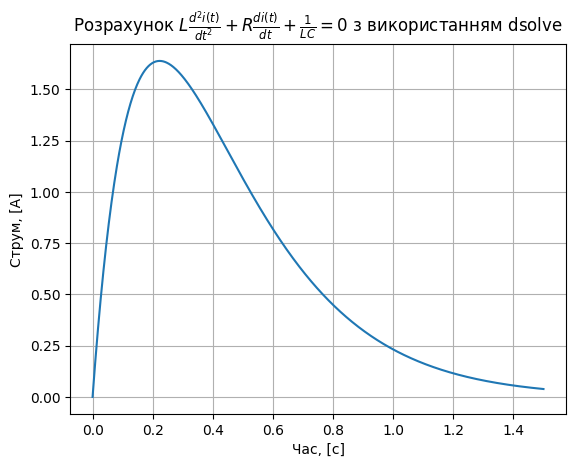

In [4]:
# Step 1: Define circuit parameters and initial conditions
R = 9  # Resistance (in ohms)
L = 1  # Inductance (in henrys)
C = 0.05  # Capacitance (in farads)
V = 20   # Applied DC voltage (in volts)

t = smp.symbols('t')  # Time symbol
I = smp.Function('I')(t)  # Current through the circuit

# Step 2: Set up the differential equation
eq = L * I.diff(t, 2) + R * I.diff(t) + 1/C * I
# Initial conditions (I(0) = 0, di/dt(0) = 0)
ics = {I.subs(t, 0): 0, L*smp.diff(I, t).subs(t, 0): V}

# Step 3: Solve the differential equation
sol = smp.dsolve(eq, I, ics=ics)

# Step 4: Convert symbolic solution to a callable function
I_func = smp.lambdify(t, sol.rhs, 'numpy')

# Step 5: Generate a range of time values
time_values = np.linspace(0, 1.5, 1000)  # Adjust the range as needed

# Step 6: Evaluate I(t) for each time point
current_values = np.array([I_func(ti) for ti in time_values])

# Step 7: Plot the graph
plt.plot(time_values, current_values)
plt.title('Розрахунок $ L\\frac{d^{2}i(t)}{dt^{2}} + R\\frac{di(t)}{dt} + \\frac{1}{LC} = 0 $ з використанням dsolve')
plt.xlabel('Час, [c]')
plt.ylabel('Струм, [A]')
plt.grid(True)
plt.show()


In [5]:
sol.rhs

-20.0*exp(-5.0*t) + 20.0*exp(-4.0*t)

---
---
### Розрахунок паралельного включення RLC  <a class="anchor" id="RLC-parallel-comutation-calculation-classic"></a>

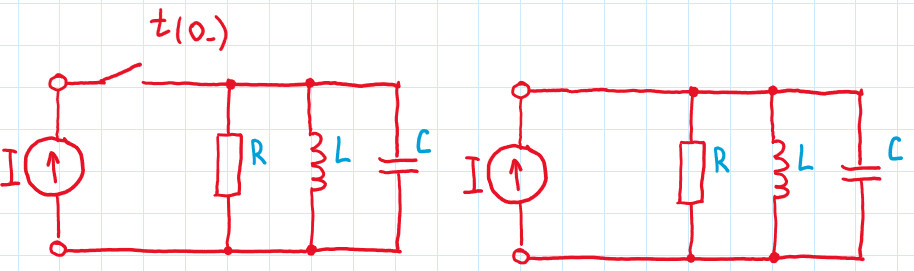

Запишемо дифиренційне рівняння для опису схеми в момент $t(0_+)$ після комутації:

$$i_{in}(t) =  i_{R}(t) + i_{L}(t) + i_{C}(t)$$

$$i_{in}(t) =  \cfrac{v}{R}  + \cfrac{1}{L} \int v dt + C \cfrac{dv}{dt}$$

Візьмемо похідну:

$$ C \cfrac{d^2v(t)}{dt^2} + \cfrac{1}{R}\cfrac{dv(t)}{dt} + \cfrac{1}{L} v(t)  = 0 $$

Поділисо на $C$ і виконаємо заміну  $D$:


$$  D^2 + \cfrac{1}{RC} D + \cfrac{1}{LC}  = 0 $$

$$ D_{1} = -\cfrac{1}{2RC} + \sqrt{  (\cfrac{1}{2RC})^2 - \cfrac{1}{LC} }$$

$$ D_{2} = -\cfrac{1}{2RC} - \sqrt{  (\cfrac{1}{2RC})^2 - \cfrac{1}{LC} }$$

Введемо заміни:

$$ \alpha = \cfrac{1}{2RC}$$

$$ \beta  = \sqrt{  (\cfrac{1}{2RC})^2 - \cfrac{1}{LC} }$$

$$ D_{1} = -\alpha + \beta$$

$$ D_{2} = -\alpha - \beta$$

---
#### Випадок 1: 

$$ (\cfrac{1}{2RC})^2 >  \cfrac{1}{LC} $$

В цьому випадку корені рівнняння негативні і некомплексні

$$ v_{c}(t) = C_{1} \cdot e^{-D_{1}t} + C_{2} \cdot e^{-D_{2}t}$$

Overdamped response

$$ (\cfrac{1}{2RC})^2 >  \cfrac{1}{LC} $$

---
#### Випадок 2: 

$$(\cfrac{1}{2RC})^2 =   \cfrac{1}{LC} $$

В цьому випадку корені рівнняння негативні, некомплексні і однакові

$$ D_{1} = D_{2} = - \alpha$$

$ v_{c}(t) = (C_{1} + C_{2}t) \cdot e^{-\alpha t}  $

Critically damped response

$$(\cfrac{1}{2RC})^2 =   \cfrac{1}{LC} $$

---
#### Випадок 3: 

$$ (\cfrac{1}{2RC})^2 <   \cfrac{1}{LC} $$

В цьому випадку корені рівнняння комплексно-спряжені

$$ D_{1} = - \alpha + j\beta $$
$$ D_{2} = - \alpha - j\beta $$

$$ v_{c}(t) = e^{-\alpha t} \cdot ( C_{1} cos( \beta t) +C_{2} sin( \beta t)) $$

Under damped response

$$ (\cfrac{1}{2RC})^2 <   \cfrac{1}{LC} $$

---
#### Випадок 4: 

$$ R = 0 $$

В цьому випадку корені рівнняння комплексні

$$ D_{1} = j \sqrt{\frac{1}{LC}} = j \omega $$
$$ D_{2} = - j \omega $$

$$ v_{c}(t) =   C_{1} cos( \omega t) +C_{2} sin( \omega t)  $$

---

In [ ]:
def g(R_sb, L_sb, C_sb):
    # Define circuit
    circuit = Circuit('RLC series connection')
    source = circuit.PulseCurrentSource('input', 1, circuit.gnd,
                                        initial_value=0@u_A, pulsed_value=10@u_A,
                                        pulse_width=100@u_ms, period=200@u_ms)
    # Define components
    circuit.R(1, 1, circuit.gnd, R_sb@u_Ω)
    circuit.L(1, 1, circuit.gnd, L_sb@u_mH)
    circuit.C(1, 1, circuit.gnd, C_sb@u_uF)

    # Perform transient analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    steptime = 1@u_us
    finaltime = 200@u_ms
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)

    # Plot the results
    figure, axe = plt.subplots(figsize=(10, 6))
    plt.title('Перехідний процес послідовно включених RLC')
    plt.xlabel('Час, [с]')
    plt.ylabel('Напруга, [В]')

    plot(analysis['1'], axis=axe)

    plt.grid()
    plt.legend(('Напруга на конденсаторі','Вхідний сигнал' ), loc='best')
    cursor = Cursor(axe, useblit=True, color='red', linewidth=1)
    plt.tight_layout()
    plt.show()

w = interactive(g, 
                R_sb=widgets.IntSlider(min=0, max=1000, step=1, value=40, description = '$R_{1}, [\Omega]$'), 
                L_sb=widgets.IntSlider(min=1, max=1000, step=1, value=300, description ='$L_{1}, [uH]$'), 
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=10, description = '$C_{1},[mF]$'))
display(w)

## Довга лінія

---

У математиці, фізиці та інженерії, поняття **довгих ліній** є ключовим для розуміння різноманітних фізичних явищ та їх моделювання. Довгі лінії - це електричні елементи зі значною довжиною у порівнянні з довжиною хвиль, які поширюються в них.

### Основні аспекти

1. **Довга лінія** - це електричний елемент, що виявляє значний вплив на передачу електричних сигналів через нього. Її довжина порівняно велика порівняно з довжиною хвиль у передаваному сигналі. Це може бути кабель, провід або структура, яка здатна передавати сигнали.

2. **Розповсюдження сигналів**: Довгі лінії мають здатність передавати електричні сигнали на великі відстані без помітних спотворень. Це дозволяє використовувати їх у телекомунікаційних мережах, системах передачі даних, а також у системах електропередачі.

3. **Характеристичний імпеданс**: Кожна довга лінія має характеристичний імпеданс ($Z_0$), що визначається властивостями самої лінії. Він відіграє важливу роль у визначенні передачі сигналів через лінію та може бути обчислений за допомогою спеціальних формул.

    Формула для характеристичного імпедансу:
    $$ Z_0 = \sqrt{\frac{R + j\omega L}{G + j\omega C}} $$
    
     Де:
    - $R$ - опір на одиницю довжини лінії,
    - $L$ - індуктивність на одиницю довжини лінії,
    - $G$ - провідність на одиницю довжини лінії,
    - $C$ - ємність на одиницю довжини лінії,
    - $\omega$ - кругова частота сигналу.

4. **Розподіл параметрів**: Довгі лінії характеризуються розподілом параметрів, таких як імпеданс, індуктивність та ємність, вздовж їх довжини. Цей розподіл може бути змінним або сталим в залежності від характеру лінії та її конструкції.

5. **Реакція на сигнали**: Довгі лінії виявляють реакцію на різноманітні сигнали, що проходять через них. Ця реакція може включати в себе затримку сигналу, зміну амплітуди та спотворення хвильової форми. Розуміння цих ефектів дозволяє інженерам ефективно проектувати та використовувати довгі лінії у різних системах.

### Важливість у практиці

Довгі лінії мають широкі застосування у різних галузях:

- **Телекомунікаційні системи**: Вони використовуються для передачі даних у телефонних мережах, Інтернеті, телевізійних та радіомовних системах.

- **Електропередача**: Довгі лінії використовуються для передачі електроенергії від джерела до споживача.

- **Електроніка**: У мікроелектроніці вони використовуються для передачі сигналів між різними частинами електронних пристроїв.

- **Мережі передачі даних**: Вони є основою для створення мереж передачі даних, які використовуються у бізнесі та особистому житті.

- **Радіоімунікація**: У бездротових системах зв'язку довгі лінії використовуються для передачі радіосигналів на великі відстані.


### Телеграфне рівняння <a class="anchor" id="Line-Telegraphe-equation"></a>

Телеграфне рівняння

$$ 
\begin{cases} 
\cfrac{\partial}{\partial x} V(x,t) = -L \cfrac{\partial}{\partial t} I(x,t)- R I(x,t) \\
\cfrac{\partial}{\partial x} I(x,t) = -C \cfrac{\partial}{\partial t} V(x,t)- G V(x,t)
\end{cases}$$

In [ ]:
# Based on
# https://github.com/ClecioJung/TransmissionLine/blob/main/TransmissionLine.m

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import sawtooth, square

# Transmission line parameters
R = 45.3e-1  # ohm/m
G = 0  # S/m (information not available in the catalog)
L = 0.205e-6  # H/m
C = 182e-12  # F/m
Z = np.sqrt(L / C)  # ohm
vel = 1 / np.sqrt(L * C)  # m/s

# Load resistor
Rl = 10  # ohm

# Arbitrary function generator
Rg = 50  # ohm
Ton = 10e-9  # s
Toff = 110e-9  # s
Vamp = 10  # V
fg = 10e6  # Hz

# Type of signal applied by the function generator
# Options: 'p'ulse, 's'ine wave, 't'riangle wave or s'q'uare wave
signal = 's'

# Finite difference method used
# Options: 'a'dvance, 'r'etrograde or 'c'entered
finiteDiff = 'c'

# Simulation method: 'e'xplicit or 'i'mplicit
method = 'i'

# Simulation intervals
dt = 1e-10  # s
t0 = 0  # s
tf = 1000e-9  # s
dx = 1e-1  # m
x0 = 0  # m
xf = 100  # m

# Animation settings
filename = 'wave.gif'  # File to save the animation
Nmax = 200  # Maximum amount of points
axisInc = Vamp / 10  # Quantization of axes

# Initial calculations
x = np.arange(x0, xf + dx, dx)
t = np.arange(t0, tf + dt, dt)
J = len(x)
N = len(t)
v = np.zeros((N, J))  # Null initial conditions

# Function generator
if signal == 's':
    Vg = lambda t: Vamp * np.heaviside(t - Ton, 0) * np.sin(2 * np.pi * fg * t)
elif signal == 't':
    Vg = lambda t: Vamp * np.heaviside(t - Ton, 0) * sawtooth(2 * np.pi * fg * t, 0.5)
elif signal == 'q':
    Vg = lambda t: Vamp * np.heaviside(t - Ton, 0) * square(2 * np.pi * fg * t)
else:  # pulse by default
    Vg = lambda t: Vamp * (np.heaviside(t - Ton, 0) - np.heaviside(t - Toff, 0))

# Parameters used in the simulation
nu = (dt / dx) ** 2 * (1 / (L * C))
tau = (G / C + R / L) * dt
if finiteDiff == 'a':
    alfa = nu / (1 + tau)
    beta = -1 / (1 + tau)
    a = -(2 + 1 / nu + tau / nu)
    b = (-2 / nu - tau / nu + R * G * dx ** 2)
    c = 1 / nu
elif finiteDiff == 'r':
    alfa = nu
    beta = -1 + tau
    a = -(2 + 1 / nu)
    b = (-2 / nu + tau / nu + R * G * dx ** 2)
    c = (1 / nu - tau / nu)
else:  # centered by default
    alfa = nu / (1 + tau / 2)
    beta = -1 + tau / (1 + tau / 2)
    a = -(2 + 1 / nu + tau / (2 * nu))
    b = (-2 / nu + R * G * dx ** 2)
    c = (1 / nu - tau / (2 * nu))
gama = 1 - beta - (2 + R * G * dx ** 2) * alfa

# Expressions for the frontier
delta = Rg * dt / (L * dx)
ro = 1 - R * dt / L - Rg * dt / (L * dx)
theta = -1 + R * dt / L
phi = Rl * dt / (L * dx)
epslon = 1 - R * dt / L - Rl * dt / (L * dx)
if Rg == 0:
    d, e, f, g = 0, 0, 0, 1
else:
    d = -1 + L * dx / (Rg * dt)
    e = -R * dx / Rg + L * dx / (Rg * dt)
    f = R * dx / Rg - L * dx / (Rg * dt)
    g = L * dx / (Rg * dt)
if Rl == 0:
    h, i = 0, 0
else:
    h = -1 + L * dx / (Rl * dt)
    i = -R * dx / Rl + L * dx / (Rl * dt)

# Simulation
if method == 'e':  # Explicit method
    for n in range(1, N - 1):
        v[n + 1, 0] = delta * v[n, 1] + ro * v[n, 0] + Vg((n + 1) * dt) + theta * Vg(n * dt)
        for j in range(1, J - 1):
            v[n + 1, j] = alfa * (v[n, j + 1] + v[n, j - 1]) + beta * v[n - 1, j] + gama * v[n, j]
        v[n + 1, J - 1] = phi * v[n, J - 2] + epslon * v[n, J - 1]
else:  # Implicit method
    A = np.zeros((J, J))
    B = np.zeros((J, J))
    F = np.zeros(J)
    G = np.zeros(J)
    for j in range(1, J - 1):
        A[j, j - 1] = 1
        A[j, j] = a
        A[j, j + 1] = 1
        B[j, j] = b
    A[0, 0] = a - d
    A[0, 1] = 1
    B[0, 0] = b - e
    A[J - 1, J - 1] = a - h
    A[J - 1, J - 2] = 1
    B[J - 1, J - 1] = b - i
    F[0] = -f
    G[0] = -g
    mA = np.linalg.solve(A, B)
    mB = c * np.linalg.inv(A)
    mC = np.linalg.solve(A, F)
    mD = np.linalg.solve(A, G)

    for n in range(1, N - 1):
        v[n + 1, :] = np.dot(mA, v[n, :]) + np.dot(mB, v[n - 1, :]) + mC * Vg(n * dt) + mD * Vg((n + 1) * dt)

# Function to update the animation frames
def update(frame):
    line.set_ydata(v[frame, :])
    ax.set_ylim(np.min(v), np.max(v))  # Adjust y-axis limits
    return line,

# Create animation
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Відстань, [м]')
ax.set_ylabel('Напруга, [В]')
ax.set_title('Розповсюдження сигналу вздовж лінії')
line, = ax.plot(x, v[0, :])
ax.set_ylim(np.min(v), np.max(v))  # Adjust y-axis limits

inc = N // Nmax if N >= Nmax else 1
N2 = (N // inc) * inc

anim = FuncAnimation(fig, update, frames=range(0, N2, inc), interval=100)
plt.close()

# Save animation as an MP4 file
anim.save('temp/wave_propagation.mp4', writer='ffmpeg')
# Display animation using HTML5 video tag
HTML('<video controls src="temp/wave_propagation.mp4" type="video/mp4">')

#an = matplotlib.animation.FuncAnimation(fig, update, frames=range(0, N2, inc))

---
# Елементи функціонального аналізу

Функціональний аналіз відіграє важливу роль у розумінні властивостей лінійних просторів сигналів та їх взаємодії. В цьому тексті ми розглянемо основні елементи функціонального аналізу, такі як лінійний простір, нормований лінійний простір, скалярний добуток, ортогональні сигнали та концепція ортогонального базису.

## Лінійний простір та його властивості

Лінійний простір - це множина $ V $ над полем $ \mathbb{F} $, де визначені операції додавання та множення на скаляр. Він має наступні властивості:
- Комутативність: $ u + v = v + u, \forall u, v \in V $
- Асоціативність: $ (u + v) + w = u + (v + w), \forall u, v, w \in V $
- Існування нейтрального елемента: $ \exists 0 \in V : v + 0 = v, \forall v \in V $
- Існування оберненого елемента: $ \forall v \in V, \exists -v \in V : v + (-v) = 0 $

## Нормований лінійний простір сигналів

Нормований лінійний простір - це лінійний простір $ V $ над полем $ \mathbb{F} $, в якому визначено норму, тобто відображення $ \| \cdot \| : V \to \mathbb{R} $, що задовольняє наступні аксіоми норми:
- Невід'ємність: $ \|v\| \geq 0, \forall v \in V $ та $ \|v\| = 0 $ тільки якщо $ v = 0 $
- Однорідність: $ \|\alpha v\| = |\alpha| \|v\|, \forall v \in V, \alpha \in \mathbb{F} $
- Нерівність трикутника: $ \|u + v\| \leq \|u\| + \|v\|, \forall u, v \in V $

## Енергія та норма сигналу

Енергія сигналу $ x(t) $ визначається як

$$ E = \int_{-\infty}^{\infty} |x(t)|^2 dt $$

де $ |x(t)|^2 $ - це квадрат модуля сигналу. 

Норма сигналу в нормованому лінійному просторі визначається як

$$ \|x\| = \sqrt{E} $$

## Концепція метрики

Метрика вводиться в нормованому просторі для вимірювання відстані між двома елементами. 

Вона задовольняє такі властивості, як неузгодженість, симетричність та нерівність трикутника.

## Скалярний добуток сигналів та його властивості

Скалярний добуток в нормованому просторі сигналів визначається як
$ \langle x, y \rangle = \int_{-\infty}^{\infty} x(t)y(t) dt $
де $ x(t) $ та $ y(t) $ - це сигнали. Скалярний добуток має наступні властивості:

- Лінійність: $ \langle \alpha x_1 + \beta x_2, y \rangle = \alpha \langle x_1, y \rangle + \beta \langle x_2, y \rangle $

- Симетричність: $ \langle x, y \rangle = \overline{\langle y, x \rangle} $, де $ \overline{\langle y, x \rangle} $ - комплексно спряжений до $ \langle y, x \rangle $

## Ортогональні сигнали

Два сигнали $ x(t) $ та $ y(t) $ в нормованому просторі називаються ортогональними, якщо їх скалярний добуток дорівнює нулю, тобто
$ \langle x, y \rangle = 0 $

## Концепція ортогонального базису

Ортогональний базис - це система векторів, в якій кожні два різних вектори є ортогональними, а також кожен вектор є ненульовим. Ортогональні базиси знаходять широке застосування у сигнальній обробці та аналізі сигналів.

## Приклади ортогональних базисів

Одним з найпоширеніших прикладів ортогонального базису є система тригонометричних функцій, таких як синуси та косинуси, що використовуються в ряді Фур'є для представлення складних сигналів. Іншим прикладом є система власних функцій оператора, таких як власні функції диференціального оператора.

Цей огляд надає загальне уявлення про елементи функціонального аналізу, які є важливими для розуміння властивостей сигналів та їх обробки.


---

# Ряди Фур'є <a class="anchor" id="Fourier_series"></a>

## Узагальнений ряд Фур'є <a class="anchor" id="Fourier_series_basic"></a>

Довільний сигнал $s(t)$ може бути представлений рядом 

$$ s(t) = \sum_{n=-\infty}^{\infty}U_{n}(t)C_{n} $$

де $C_{n}$ - коефіцієнти, що залежать від виду $s(t)$, а $u_{n}$ - $n$-та функція обраного базису $\{u_{n}(t)\}$ , причому базисні функції на інтервалі ортогональності повинні мати властивості: 

1. ортогональності $$ \int_{a}^{b}u_{n}(t)u_{k}(t)dt = 0 $$, за умови $n \neq k $, $[a,b]$ - інтервал ортогональності. 

2. скінченності енергії: $$\int_{a}^{b}u_{n}^{2}(t)dt \neq 0 $$. Величина цієї енергії називається квадратом норми:

$$  \int_{a}^{b}u_{n}^{2}(t)dt  =  || u(t)_{n}||^{2}  $$

Коефіцієнти узагальненого ряду Фур'є визначаються за формулою: 

$$ C_{n} = \cfrac{1}{ || u(t)_{n}||^{2}  } \int_{a}^{b}s(t)u_{n}(t)dt $$


Якщо набір базисних функцій містить комплексні функції, то властивості відображаються таким чином:

$$ \int_{a}^{b}u_{n}(t)u_{k}^{\bullet}(t)dt = 0 $$ для $n \neq k$;

 тут $u_{k}^{\bullet}(t)$ - функція, комплексно спряжена $u_{k}(t)$;
 
$$ \int_{a}^{b}u_{n}(t)u_{k}^{\bullet}(t)dt \neq 0 $$

, а комплексні коефіцієнти ряду визначаються співвідношенням: 

$$ C_{n} = \cfrac{1}{ || u(t)_{n}||^{2}  } \int_{a}^{b}s(t)u_{n}^{+}(t)dt $$




### Тригонометричний ряд Фур'є  <a class="anchor" id="Fourier_series_trig"></a>

Нехай є періодичний сигнал із періодом $Т$ тобто 

$$ s(t) = s(t+T)$$

Для тригонометричного ряду Фур'є набір базисних функцій має вигляд: 

$$
\{ u(t)_{n}\} = 
\begin{bmatrix}
1 & cos(\omega_{1}t) & cos(2\omega_{1}t) & cos(3\omega_{1}t) & ... & cos(n\omega_{1}t) \\
  & sin(\omega_{1}t) & sin(2\omega_{1}t) & sin(3\omega_{1}t) & ... & sin(n\omega_{1}t) \\
\end{bmatrix}
$$
 
де 
- $\omega_{1} = \cfrac{2\pi}{T}$; $f_{1} = \cfrac{1}{T}$ частота першої гармоніки; 

Частоти $n \cdot \omega_{1}$ або $n \cdot f_{1}$ - частоти вищих гармонійних складових. 

Інтервал ортогональності в цьому випадку дорівнює $Т$. Тригонометричні функції кратних аргументів ортогональні одна одній. 

Квадрат норми базисної функції $u(t)_{0}=1$ дорівнює: 

$$ || u_{0}(t)dt||^{2} = \int_{0}^{T}1^{2}dt = T $$

Квадрат норми для базисних функцій $u_{n}(t)=cos(n \omega_{1} t)$ при $(n \neq 0)$ дорівнює: 

$$ || u(t)_{n}dt||^{2} = \int_{0}^{T}  cos^{2}(n \omega_{1} t) dt = \cfrac{T}{2} $$

Квадрат норми для функцій $u_{n}(t)=sin(n \omega_{1} t)$ при $(n \neq 0)$ дорівнює. 

$$ || u(t)_{n}dt||^{2} = \int_{0}^{T}  sin^{2}(n \omega_{1} t) dt = \cfrac{T}{2} $$
 
Таким чином, коефіцієнти ряду визначаються як:

> $$ C_{0} = a_{0} = \cfrac{1}{T} \cdot \int_{0}^{T}  s(t) \cdot 1 dt $$
> 
> $$ C_{0}^{cos} = a_{n} = \cfrac{2}{T} \cdot \int_{0}^{T}  s(t) \cdot cos(n \omega_{1} t) dt $$
> 
> $$ C_{0}^{sin} = b_{n} = \cfrac{2}{T} \cdot \int_{0}^{T}  s(t) \cdot sin(n \omega_{1} t) dt $$

Тригонометричний ряд Фур'є матиме вигляд: 

 $$
 s(t) = a_{0} + a_{1}\cdot cos(1 \omega_{1} t) + a_{2}\cdot cos(2 \omega_{1} t) + ... + a_{n}\cdot cos(n \omega_{1} t) \newline
 + b_{1}\cdot sin(1 \omega_{1} t) + b_{2}\cdot sin(2 \omega_{1} t) + ... + b_{n}\cdot sin(n \omega_{1} t) \\
 $$


> $$ s(t) = a_{0} + \sum_{n=1}^{\infty} a_{n}\cdot cos(n \omega_{1} t) + b_{n}\cdot sin(n \omega_{1} t) $$




### Тригонометричний ряд Фур'є з полярними координатами  <a class="anchor" id="Fourier_series_polar"></a>

Перетворимо кожну пару з однаковими частотами: 

$$ a_{n}\cdot cos(n \omega_{1} t) + b_{n}\cdot sin(n \omega_{1} t) =  A_{n} \cdot cos(n \omega_{1} t - \alpha_{n})$$

Дійсно:

$$A_{n} \cdot cos(n \omega_{1} t - \alpha_{n}) =   A_{n} \cdot cos(\alpha_{n}) \cdot cos(n \omega_{1} t) + A_{n} \cdot sin(\alpha_{n})\cdot sin(n \omega_{1} t) $$

Таким чином:

$$A_{n} = \sqrt{a_{n}^{2} + b_{n}^{2}}$$

$$\alpha_{n} = arctg \cfrac{b_{n}}{a_{n}}$$

Величину $a_{0}$ можна виразити через загальну формулу для $cos(n \omega_{1} t)$ при $n=0$, тоді $a_{0} = \cfrac{A_{0}}{2}$. 

Позначивши $$ \varphi_{n} = - \alpha_{n} $$, отримуємо відому форму запису тригонометричного ряду Фур'є: 

> $$ s(t) = a_{0} + \sum_{n=1}^{\infty} A_{n} cos(n \omega_{1}t+\varphi_{n}) $$


Для парних функцій $s(t)$ усі непарні члени ряду дорівнюють 0, тобто $b_{n}=0$, отже:

$$A_{n} = a_{n}$$

$$\alpha_{n} = 0$$

Для непарних функцій, усі парні члени ряду дорівнюють 0, тобто всі a_{n}, зокрема й $a_{0}$ дорівнюють 0, отже:

$$A_{n} = b_{n}$$

$$\alpha_{n} = - \cfrac{\pi}{2}$$

Часова інтерпретація тригонометричного ряду Фур'є показана на риcунку. 

Складаючи в кожен момент часу миттєві значення всіх гармонік, отримуємо миттєве значення самого сигналу в цей момент часу. 
 
Знаходження частот, амплітуд і фаз складових сигналу називається **спектральним аналізом**. 

Отримання сигналу за заданими коефіцієнтами $ A_{n} $, фазами $ \varphi_{n} $, і частотами $n\omega_{1}$ називається **синтезом сигналів**. Складаючи обмежену кількість гармонік, отримуємо сигнал, відмінний від того, для якого розраховувалися амплітуди і фази гармонік. 

### Комплексна форма ряду Фур'є  <a class="anchor" id="Fourier_series_complex"></a>

We can approximate a periodic function of period P to arbitrary accuracy by adding sine and cosine terms (disguised via the Euler formula in the complex exponential):

$$ S_N(t) = \sum_{n=-N}^N c_n \exp \left( \frac{i 2\pi n t}{T}\right) $$

$$ c_n = \frac{1}{T} \int_{t_0}^{t_0 + P} f(t) \exp \left( \frac{-i 2\pi n t}{P}\right) \mathrm{d}t $$


### Приклад розрахунку тригонометричного ряду Фурьє  <a class="anchor" id="Fourier_series_trig_example"></a>

-sin(t) + sin(2*t)/2 - sin(3*t)/3 + sin(4*t)/4 - sin(5*t)/5 - 2*cos(t)/pi - 2*cos(3*t)/(9*pi) - 2*cos(5*t)/(25*pi) + pi/4


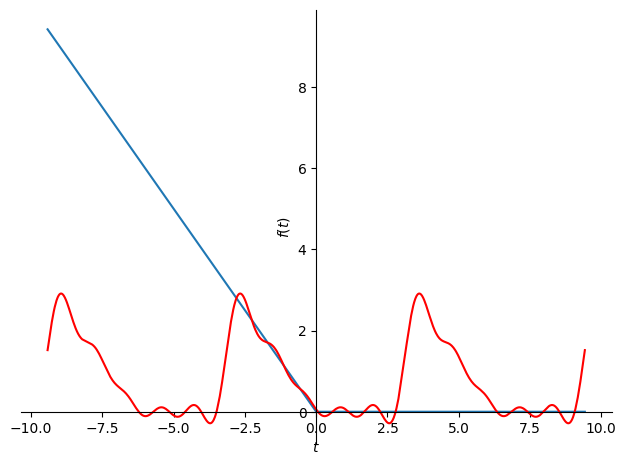

In [19]:
import sympy as smp
i2pi = smp.I*2*smp.pi
exp = smp.exp

def f(t):
    return -t+smp.Heaviside(t)*t

def a0():
    return 1/T*smp.integrate(
        f(t),
        (t, t0, t0 + T))

def a(n):
    return 2/T*smp.integrate(
        f(t)*smp.cos(2*smp.pi*n*t/T),
        (t, t0, t0 + T))

def b(n):
    return 2/T*smp.integrate(
        f(t)*smp.sin(2*smp.pi*n*t/T),
        (t, t0, t0 + T))

def S(N):
    return a0()+sum( a(n)*smp.cos(n*t*2*smp.pi/T)+b(n)*smp.sin(n*t*2*smp.pi/T) for n in range(1, N+1)).expand(complex=True).simplify()
        
T = 2*smp.pi
t0 = -smp.pi

t = smp.Symbol('t', real=True)

N = 5

analytic_approx = S(N).expand()
print(analytic_approx)

interval = (t, t0-T, t0+2*T)

### Тригонометричний ряд Фур'є
p1 = smp.plot(f(t), interval, show=False)
p2 = smp.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

### Приклад розрахунку перетворення Фурьє  <a class="anchor" id="Fourier_series_polar_example"></a>

2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5


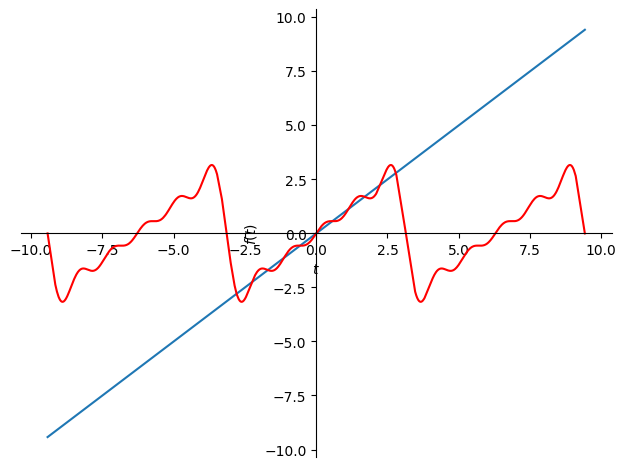

In [38]:
import sympy
i2pi = sympy.I*2*sympy.pi
exp = sympy.exp

def f(t):
    return t

def c(n):
    return (sympy.integrate(
               f(t)*exp((-i2pi * n * t)/P),
               (t, t0, t0 + P))/P)    
def S(N):
    return sum(c(n)*exp(i2pi*n*t/P) for n in range(-N, N+1)).expand(complex=True).simplify()
    
a = sympy.Symbol('a', positive=True)

P = 2*sympy.pi
t0 = -sympy.pi

t = sympy.Symbol('t', real=True)

N = 5

analytic_approx = S(N).expand()
print(analytic_approx)

interval = (t, t0-P, t0+2*P)
p1 = sympy.plot(f(t), interval, show=False)
p2 = sympy.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

### Приклад використання дискретного перетворення Фурьє для отримання спектру сигналу з мікрофона   <a class="anchor" id="Fourier_transform_discrete_microphone"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Define parameters
duration = 5  # seconds
sample_rate = 44100  # Hz

# Function to capture audio
def capture_audio(duration, sample_rate):
    print("Recording...")
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()
    print("Recording stopped.")
    return audio_data.flatten()

# Function to compute Fourier transform
def compute_fft(audio_data, sample_rate):
    n = len(audio_data)
    freqs = np.fft.fftfreq(n, d=1/sample_rate)
    fft_vals = np.abs(np.fft.fft(audio_data))
    return freqs[:n//2], fft_vals[:n//2]

# Function to plot spectrum with limited frequency range
def plot_spectrum(freqs, fft_vals, max_freq=1200):
    plt.figure(figsize=(10, 4))
    plt.plot([262, 262], [0, 400], 'r') # plotting t, b separately 
    plt.text(262, 200, '$\leftarrow$ Нота С 1 октава', fontsize = 10)
    plt.plot([524, 524], [0, 400], 'r') # plotting t, b separately 
    plt.text(524, 200, '$\leftarrow$ Нота С 2 октава', fontsize = 10)
    plt.plot(freqs, fft_vals)
    plt.title('Спектр сигналу')
    plt.xlabel('Частота, [Гц]')
    plt.ylabel('Амплітуда')
    plt.grid(True)
    plt.xlim(0, max_freq)  # Limit x-axis from 0 to max_freq Hz
    plt.show()

# Function to handle button click event
def on_button_clicked(b):
    audio_data = capture_audio(duration, sample_rate)
    freqs, fft_vals = compute_fft(audio_data, sample_rate)
    plot_spectrum(freqs, fft_vals)

# Create button widget
button = widgets.Button(description="Почати запис")
button.on_click(on_button_clicked)

# Display button
display(button)


In [ ]:
 audio_data = capture_audio(duration, sample_rate)
 freqs, fft_vals = compute_fft(audio_data, sample_rate)
 plot_spectrum(freqs, fft_vals)

### Розрахунок перехідного процесу

In [32]:
#Step 1: Define circuit parameters and initial conditions
R = 1600 # Resistance (in ohms)
L = 0.01 # Inductance (in henrys)
C = 0.000000015
V = 1 #Applied DC voltage (in volts)

time_values = np.linspace(0, 0.001, 1000) # Adjust the range as needed

In [33]:
t = sp.symbols('t') # Time symbol
I = sp.Function('I')(t) # Current through the circuit

#Step 2: Set up the differential equation
eq = L * I.diff(t, 2) + R * I.diff(t) + 1/C * I

#Initial conditions (I(0) = 0, di/dt(0) = 0)
ics = {I.subs(t, 0): 0, sp.diff(I, t).subs(t, 0): V/L}

#Step 3: Solve the differential equation
sol = sp.dsolve(eq, I, ics=ics)

i2 = 0.00597 * sp.exp(-80000 * t) * sp.sin(16330 * t)

#Step 4: Convert symbolic solution to a callable function
I_func = sp.lambdify(t, sol.rhs, 'numpy')
I_func2 = sp.lambdify(t, i2, 'numpy')

#Step 6: Evaluate I(t) for each time point
current_values = np.array([I_func(ti) for ti in time_values])
current_values2 = np.array([I_func2(ti) for ti in time_values])

In [34]:
p = sp.symbols('p')
#Крок 2: Налаштуйте диференціальне рівняння
eq = (V * C)/ (p**2 * L * C + p * R * C + 1) 
print(eq)

num,den = sp.fraction(eq)
print(num)
print(den)

#Крок 3: Розв'яжіть диференціальне рівняння
sol_p = sp.solve([den], [p], dict=True)
print(sol)

den_diff = sp.diff(den, p)
print(den_diff)

I = sp.Function('I')(t) # Current through the circuit
I = ((num.subs(p,sol_p[0][p]))/(den_diff.subs(p,sol_p[0][p])))*sp.exp(sol_p[0][p]*t)+((num.subs(p,sol_p[1][p]))/(den_diff.subs(p,sol_p[1][p])))*sp.exp(sol_p[1][p]*t)
I_func = sp.lambdify(t, I, 'numpy')

#Крок 6: Оцініть I(t) для кожного моменту часу
current_values3 = np.array([I_func(ti) for ti in time_values])

1.5e-8/(1.5e-10*p**2 + 2.4e-5*p + 1)
1.50000000000000e-8
1.5e-10*p**2 + 2.4e-5*p + 1
Eq(I(t), 0.00612372435695795*exp(-80000.0*t)*sin(16329.9316185545*t))
3.0e-10*p + 2.4e-5


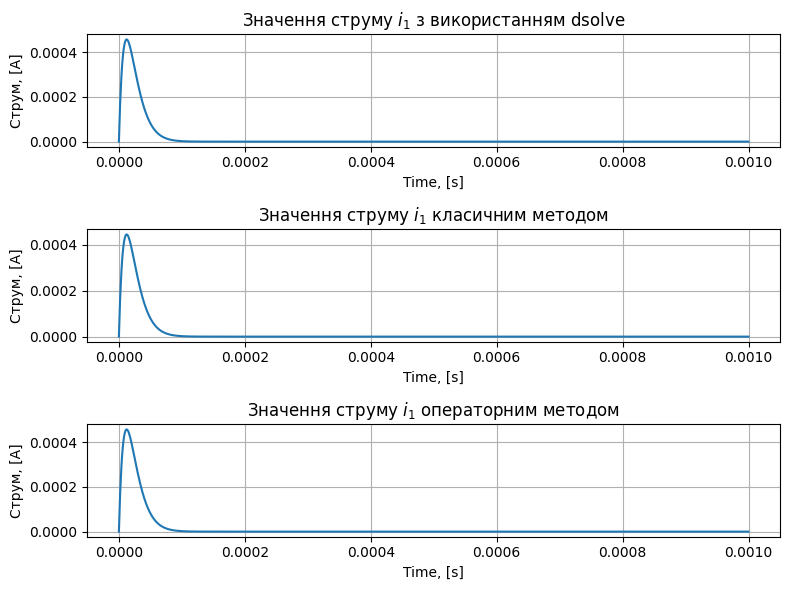

In [35]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# Plot each current_values on separate subplot
axs[0].plot(time_values, current_values, label='Current 1')
axs[0].set_title('Значення струму $i_{1}$ з використанням dsolve')
axs[0].set_xlabel('Time, [s]')
axs[0].set_ylabel('Струм, [A]')
axs[0].grid(True)

axs[1].plot(time_values, current_values2, label='Current 2')
axs[1].set_title('Значення струму $i_{1}$ класичним методом')
axs[1].set_xlabel('Time, [s]')
axs[1].set_ylabel('Струм, [A]')
axs[1].grid(True)

axs[2].plot(time_values, current_values3, label='Current 3')
axs[2].set_title('Значення струму $i_{1}$ операторним методом')
axs[2].set_xlabel('Time, [s]')
axs[2].set_ylabel('Струм, [A]')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
# Operation with serial port

In [ ]:
import serial
import struct
import matplotlib.pyplot as plt

# Configure the serial port
ser = serial.Serial('COM6', 9600)  # Replace 'COMX' with the appropriate port
ser.timeout = 1  # Set timeout to 1 second

# Initialize data arrays
samples = []
voltages = []

# Data acquisition loop
try:
    sample_count = 0
    while sample_count < 1000:
        # Read 2 bytes of data from Arduino
        data = ser.read(2)
        
        if len(data) == 2:
            # Unpack the received data (assuming little-endian format)
            adc_value = struct.unpack('<H', data)[0]
            
            # Convert ADC value to voltage (assuming 10-bit resolution and 5V reference voltage)
            voltage = adc_value * (5.0 / 1023.0)
            
            # Append the data to arrays
            samples.append(sample_count + 1)
            voltages.append(voltage)
            
            sample_count += 1
            
except KeyboardInterrupt:
    print("Data acquisition interrupted.")

finally:
    # Close the serial port
    ser.close()

# Visualize the collected data
plt.plot(samples, voltages, 'r-')
plt.xlabel('Sample')
plt.ylabel('Voltage (V)')
plt.title('ADC Data Visualization')
plt.grid(True)
plt.show()
